# Problem Statement
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [1]:
#Importing EDA and Data Visualization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
%matplotlib inline

#Importing Regression libraries
import statsmodels.formula.api as smf

#Ignoring Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting up figure Parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [3]:
df = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

In [4]:
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [5]:
df.drop(columns={'Id'},inplace=True)

In [6]:
df.head()

Model  Price  Age_08_04  \
0   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color   Color  ...  \
0         10      2002  46986    Diesel  90          1    Blue  ...   
1         10      2002  72937    Diesel  90          1  Silver  ...   
2          9      2002  41711    Diesel  90          1    Blue  ...   
3          7      2002  48000    Diesel  90          0   Black  ...   
4          3      2002  38500    Diesel  90          0   Black  ...   

   Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0             1                1               1      0          0   
1             1                0               1      0          0   
2             0                0               1      0          0   
3             0                0               1      0          0   
4             1                1               1      0          1   

   Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0            0                 1             0               0        0  
1            0                 1             0               0        0  
2            0                 1             0               0        0  
3            0                 1             0               0        0  
4            0                 1             0               0        0  

[5 rows x 37 columns]

In [7]:
df.shape

(1436, 37)

In [8]:
df.describe().T

count          mean           std     min      25%  \
Price             1436.0  10730.824513   3626.964585  4350.0   8450.0   
Age_08_04         1436.0     55.947075     18.599988     1.0     44.0   
Mfg_Month         1436.0      5.548747      3.354085     1.0      3.0   
Mfg_Year          1436.0   1999.625348      1.540722  1998.0   1998.0   
KM                1436.0  68533.259749  37506.448872     1.0  43000.0   
HP                1436.0    101.502089     14.981080    69.0     90.0   
Met_Color         1436.0      0.674791      0.468616     0.0      0.0   
Automatic         1436.0      0.055710      0.229441     0.0      0.0   
cc                1436.0   1576.855850    424.386770  1300.0   1400.0   
Doors             1436.0      4.033426      0.952677     2.0      3.0   
Cylinders         1436.0      4.000000      0.000000     4.0      4.0   
Gears             1436.0      5.026462      0.188510     3.0      5.0   
Quarterly_Tax     1436.0     87.122563     41.128611    19.0     69.0   
Weight            1436.0   1072.459610     52.641120  1000.0   1040.0   
Mfr_Guarantee     1436.0      0.409471      0.491907     0.0      0.0   
BOVAG_Guarantee   1436.0      0.895543      0.305959     0.0      1.0   
Guarantee_Period  1436.0      3.815460      3.011025     3.0      3.0   
ABS               1436.0      0.813370      0.389750     0.0      1.0   
Airbag_1          1436.0      0.970752      0.168559     0.0      1.0   
Airbag_2          1436.0      0.722841      0.447751     0.0      0.0   
Airco             1436.0      0.508357      0.500104     0.0      0.0   
Automatic_airco   1436.0      0.056407      0.230786     0.0      0.0   
Boardcomputer     1436.0      0.294568      0.456007     0.0      0.0   
CD_Player         1436.0      0.218663      0.413483     0.0      0.0   
Central_Lock      1436.0      0.580084      0.493717     0.0      0.0   
Powered_Windows   1436.0      0.561978      0.496317     0.0      0.0   
Power_Steering    1436.0      0.977716      0.147657     0.0      1.0   
Radio             1436.0      0.146240      0.353469     0.0      0.0   
Mistlamps         1436.0      0.256964      0.437111     0.0      0.0   
Sport_Model       1436.0      0.300139      0.458478     0.0      0.0   
Backseat_Divider  1436.0      0.770195      0.420854     0.0      1.0   
Metallic_Rim      1436.0      0.204735      0.403649     0.0      0.0   
Radio_cassette    1436.0      0.145543      0.352770     0.0      0.0   
Tow_Bar           1436.0      0.277855      0.448098     0.0      0.0   

                      50%       75%       max  
Price              9900.0  11950.00   32500.0  
Age_08_04            61.0     70.00      80.0  
Mfg_Month             5.0      8.00      12.0  
Mfg_Year           1999.0   2001.00    2004.0  
KM                63389.5  87020.75  243000.0  
HP                  110.0    110.00     192.0  
Met_Color             1.0      1.00       1.0  
Automatic             0.0      0.00       1.0  
cc                 1600.0   1600.00   16000.0  
Doors                 4.0      5.00       5.0  
Cylinders             4.0      4.00       4.0  
Gears                 5.0      5.00       6.0  
Quarterly_Tax        85.0     85.00     283.0  
Weight             1070.0   1085.00    1615.0  
Mfr_Guarantee         0.0      1.00       1.0  
BOVAG_Guarantee       1.0      1.00       1.0  
Guarantee_Period      3.0      3.00      36.0  
ABS                   1.0      1.00       1.0  
Airbag_1              1.0      1.00       1.0  
Airbag_2              1.0      1.00       1.0  
Airco                 1.0      1.00       1.0  
Automatic_airco       0.0      0.00       1.0  
Boardcomputer         0.0      1.00       1.0  
CD_Player             0.0      0.00       1.0  
Central_Lock          1.0      1.00       1.0  
Powered_Windows       1.0      1.00       1.0  
Power_Steering        1.0      1.00       1.0  
Radio                 0.0      0.00       1.0  
Mistlamps             0.0      1.00       1.0  
Sport_Model           0

In [9]:
df.isna().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

We have to build a Multiple Linear Regression Model over this dataset.

We would be predicting the Price of the vehical based of different factors of a car.

We have to remove some unwanted columns in the dataset as these many columns will increase the complexity of the algorithm.
Therefore we now analyse the dataset and drop unwanted columns 

In [10]:
df.rename(columns={'Age_08_04' : 'Age'}, inplace=True)

In [11]:
df.T

0     \
Model             TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors   
Price                                                     13500   
Age                                                          23   
Mfg_Month                                                    10   
Mfg_Year                                                   2002   
KM                                                        46986   
Fuel_Type                                                Diesel   
HP                                                           90   
Met_Color                                                     1   
Color                                                      Blue   
Automatic                                                     0   
cc                                                         2000   
Doors                                                         3   
Cylinders                                                     4   
Gears                                                         5   
Quarterly_Tax                                               210   
Weight                                                     1165   
Mfr_Guarantee                                                 0   
BOVAG_Guarantee                                               1   
Guarantee_Period                                              3   
ABS                                                           1   
Airbag_1                                                      1   
Airbag_2                                                      1   
Airco                                                         0   
Automatic_airco                                               0   
Boardcomputer                                                 1   
CD_Player                                                     0   
Central_Lock                                                  1   
Powered_Windows                                               1   
Power_Steering                                                1   
Radio                                                         0   
Mistlamps                                                     0   
Sport_Model                                                   0   
Backseat_Divider                                              1   
Metallic_Rim                                                  0   
Radio_cassette                                                0   
Tow_Bar                                                       0   

                                                           1     \
Model             TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors   
Price                                                     13750   
Age                                                          23   
Mfg_Month                                                    10   
Mfg_Year                                                   2002   
KM                                                        72937   
Fuel_Type                                                Diesel   
HP                                                           90   
Met_Color                                                     1   
Color                                                    Silver   
Automatic                                                     0   
cc                                                         2000   
Doors                                                         3   
Cylinders                                                     4   
Gears                                                         5   
Quarterly_Tax                                               210   
Weight                                                     1165   
Mfr_Guarantee                                                 0   
BOVAG_Guarantee                                               1   
Guarantee_Period                                              3   
ABS                                                           1   
Airbag_1                              

In [12]:
# List of columns which are important for analysis

# Price, Age, Mfg_Year, KM, HP, CC, Quarterly Tax, Weight, Gurantee Period.

In [13]:
df.columns

Index(['Model', 'Price', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type',
       'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age               1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [15]:
data = df[['Price','Age','Mfg_Year','KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']]

In [16]:
data

Price  Age  Mfg_Year     KM   HP    cc  Quarterly_Tax  Weight  \
0     13500   23      2002  46986   90  2000            210    1165   
1     13750   23      2002  72937   90  2000            210    1165   
2     13950   24      2002  41711   90  2000            210    1165   
3     14950   26      2002  48000   90  2000            210    1165   
4     13750   30      2002  38500   90  2000            210    1170   
...     ...  ...       ...    ...  ...   ...            ...     ...   
1431   7500   69      1998  20544   86  1300             69    1025   
1432  10845   72      1998  19000   86  1300             69    1015   
1433   8500   71      1998  17016   86  1300             69    1015   
1434   7250   70      1998  16916   86  1300             69    1015   
1435   6950   76      1998      1  110  1600             19    1114   

      Guarantee_Period  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
1431                 3  
1432                 3  
1433                 3  
1434                 3  
1435                 3  

[1436 rows x 9 columns]

In [17]:
data.describe()

Price          Age     Mfg_Year             KM           HP  \
count   1436.000000  1436.000000  1436.000000    1436.000000  1436.000000   
mean   10730.824513    55.947075  1999.625348   68533.259749   101.502089   
std     3626.964585    18.599988     1.540722   37506.448872    14.981080   
min     4350.000000     1.000000  1998.000000       1.000000    69.000000   
25%     8450.000000    44.000000  1998.000000   43000.000000    90.000000   
50%     9900.000000    61.000000  1999.000000   63389.500000   110.000000   
75%    11950.000000    70.000000  2001.000000   87020.750000   110.000000   
max    32500.000000    80.000000  2004.000000  243000.000000   192.000000   

                cc  Quarterly_Tax      Weight  Guarantee_Period  
count   1436.00000    1436.000000  1436.00000       1436.000000  
mean    1576.85585      87.122563  1072.45961          3.815460  
std      424.38677      41.128611    52.64112          3.011025  
min     1300.00000      19.000000  1000.00000          3.000000  
25%     1400.00000      69.000000  1040.00000          3.000000  
50%     1600.00000      85.000000  1070.00000          3.000000  
75%     1600.00000      85.000000  1085.00000          3.000000  
max    16000.00000     283.000000  1615.00000         36.000000

In [18]:
data[data.duplicated()]

Price  Age  Mfg_Year     KM   HP    cc  Quarterly_Tax  Weight  \
113  24950    8      2004  13253  116  2000            234    1320   

     Guarantee_Period  
113                 3

In [19]:
data = data.drop_duplicates().reset_index(drop=True)

In [20]:
data[data.duplicated()]

Empty DataFrame
Columns: [Price, Age, Mfg_Year, KM, HP, cc, Quarterly_Tax, Weight, Guarantee_Period]
Index: []

In [21]:
data

Price  Age  Mfg_Year     KM   HP    cc  Quarterly_Tax  Weight  \
0     13500   23      2002  46986   90  2000            210    1165   
1     13750   23      2002  72937   90  2000            210    1165   
2     13950   24      2002  41711   90  2000            210    1165   
3     14950   26      2002  48000   90  2000            210    1165   
4     13750   30      2002  38500   90  2000            210    1170   
...     ...  ...       ...    ...  ...   ...            ...     ...   
1430   7500   69      1998  20544   86  1300             69    1025   
1431  10845   72      1998  19000   86  1300             69    1015   
1432   8500   71      1998  17016   86  1300             69    1015   
1433   7250   70      1998  16916   86  1300             69    1015   
1434   6950   76      1998      1  110  1600             19    1114   

      Guarantee_Period  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
1430                 3  
1431                 3  
1432                 3  
1433                 3  
1434                 3  

[1435 rows x 9 columns]

In [22]:
data['Mfg_Year'].unique()

array([2002, 2003, 2004, 2001, 2000, 1999, 1998], dtype=int64)

In [23]:
data['cc'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [24]:
data['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [25]:
data['Guarantee_Period'].unique()

array([ 3, 12, 18, 13, 20, 24, 28, 36,  6], dtype=int64)

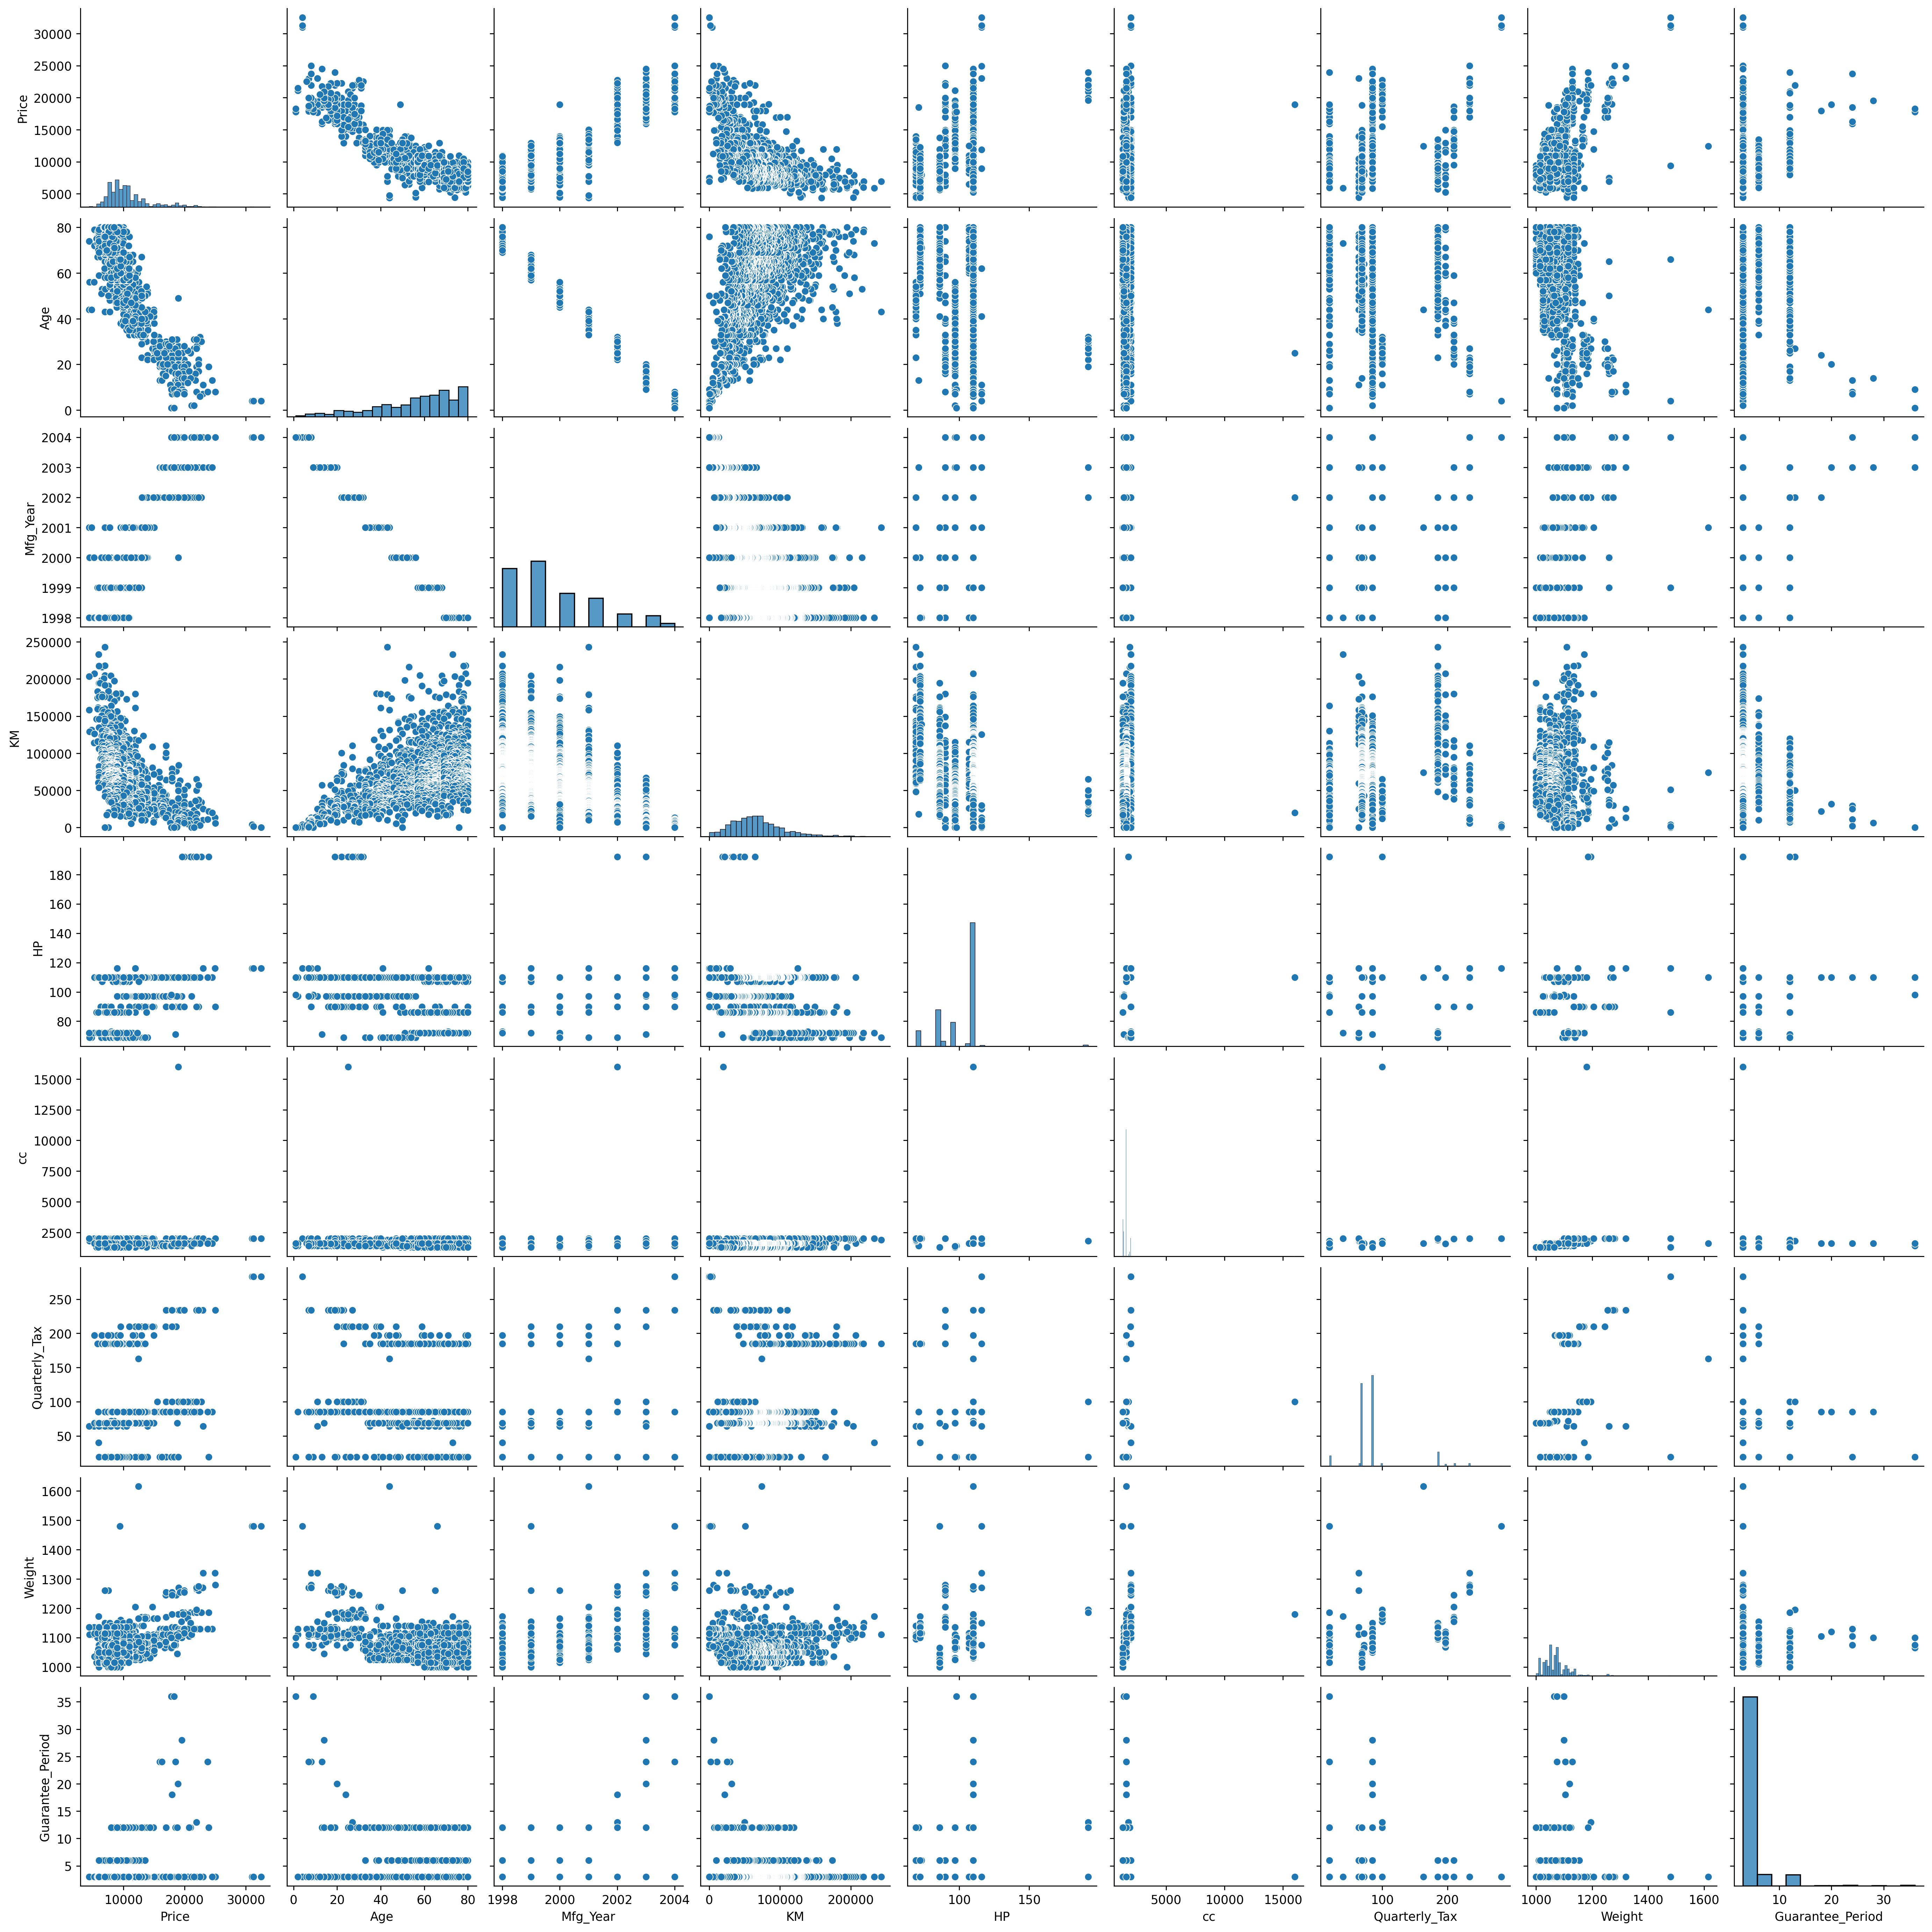

In [26]:
sns.pairplot(data)

<AxesSubplot:>

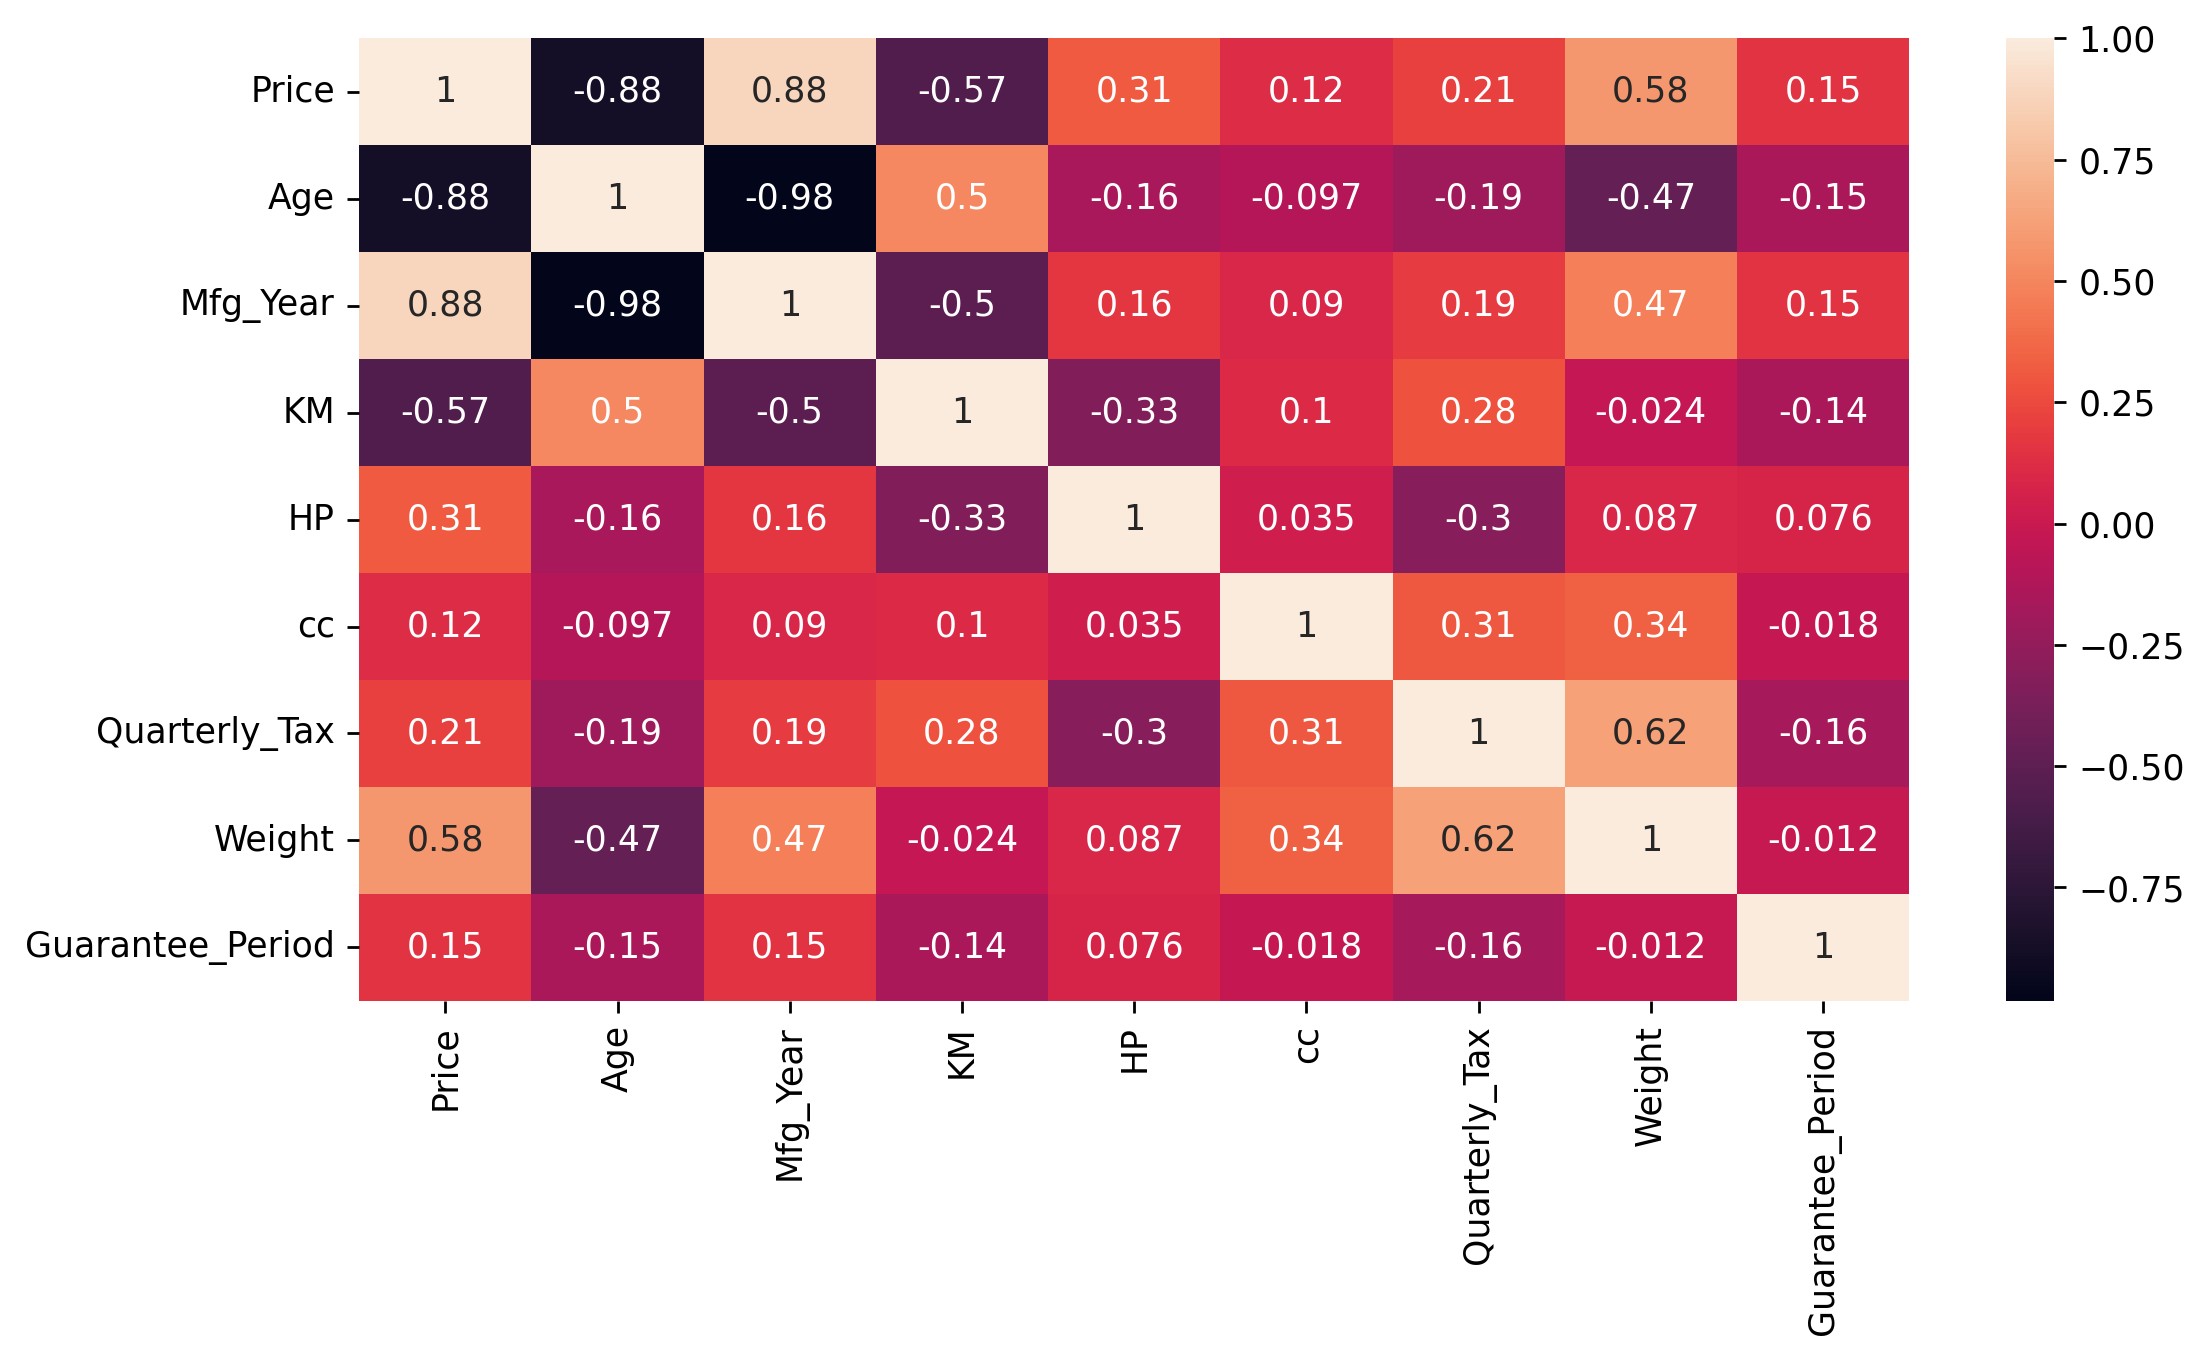

In [27]:
sns.heatmap(data.corr(), annot=True)

We now move towards model building. We build a sample model and Evaluate it to check how is itperforming.

NOTE: We haven't worked on outliers as of yet.

In [28]:
data.columns

Index(['Price', 'Age', 'Mfg_Year', 'KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight',
       'Guarantee_Period'],
      dtype='object')

In [29]:
model = smf.ols('Price ~ Age + Mfg_Year + KM + HP + cc + Quarterly_Tax + Weight + Guarantee_Period', data=data).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1207.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:19:52   Log-Likelihood:                -12318.
No. Observations:                1435   AIC:                         2.465e+04
Df Residuals:                    1426   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.528e+06   2.49e+05    -10.137      0.000   -3.02e+06   -2.04e+06
Age                -19.8067     10.313     -1.921      0.055     -40.036       0.423
Mfg_Year          1260.4828    124.473     10.127      0.000    1016.313    1504.652
KM                  -0.0200      0.001    -16.540      0.000      -0.022      -0.018
HP                  33.0112      2.646     12.476      0.000      27.821      38.202
cc                  -0.0888      0.087     -1.018      0.309      -0.260       0.082
Quarterly_Tax        4.9577      1.281      3.869      0.000       2.444       7.471
Weight              15.7735      1.005     15.700      0.000      13.803      17.744
Guarantee_Period    29.7322     11.768      2.527      0.012       6.648      52.816
==============================================================================
Omnibus:                      174.667   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1409.520
Skew:                          -0.244   Prob(JB):                    8.44e-307
Kurtosis:                       7.831   Cond. No.                     5.69e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model.params

Intercept          -2.527957e+06
Age                -1.980673e+01
Mfg_Year            1.260483e+03
KM                 -2.000500e-02
HP                  3.301115e+01
cc                 -8.880980e-02
Quarterly_Tax       4.957721e+00
Weight              1.577346e+01
Guarantee_Period    2.973223e+01
dtype: float64

In [32]:
cc = smf.ols('Price~cc', data=data).fit()
cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           2.29e-06
Time:                        14:19:52   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating the VIF Score

In [33]:
data.columns

Index(['Price', 'Age', 'Mfg_Year', 'KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight',
       'Guarantee_Period'],
      dtype='object')

In [34]:
r_Age = smf.ols('Age ~ KM+cc+Quarterly_Tax+Weight+Guarantee_Period', data=data).fit().rsquared
vif_Age = 1 / (1 - r_Age)

r_KM = smf.ols('KM ~ Age+cc+Quarterly_Tax+Weight+Guarantee_Period', data=data).fit().rsquared
vif_KM = 1 / (1 - r_KM)

r_HP = smf.ols('HP ~ Age+KM+cc+Quarterly_Tax+Weight+Guarantee_Period', data=data).fit().rsquared
vif_HP = 1 / (1 - r_HP)

r_cc = smf.ols('cc ~ Age+KM+Quarterly_Tax+Weight+Guarantee_Period', data=data).fit().rsquared
vif_cc = 1 / (1 - r_cc)

r_Quarterly_Tax = smf.ols('Quarterly_Tax ~ Age+KM+cc+Weight+Guarantee_Period', data=data).fit().rsquared
vif_Quarterly_Tax = 1 / (1 - r_Quarterly_Tax)

r_Weight = smf.ols('Weight ~ KM+cc+Quarterly_Tax+Guarantee_Period', data=data).fit().rsquared
vif_Weight = 1 / (1 - r_Weight)

r_Guarantee = smf.ols('Guarantee_Period ~ KM+cc+Quarterly_Tax+Weight', data=data).fit().rsquared
vif_Guarantee = 1 / (1 - r_Guarantee)

In [35]:
vif = pd.DataFrame({
    'Feature' : ['Age', 'KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight', 'Guarantee_Period'],
    'vif_Score' : [vif_Age,vif_KM,vif_HP, vif_cc,vif_Quarterly_Tax,vif_Weight,vif_Guarantee]
})

In [36]:
vif

Feature  vif_Score
0               Age   1.911723
1                KM   1.686881
2                HP   1.336532
3                cc   1.153703
4     Quarterly_Tax   2.004004
5            Weight   1.848404
6  Guarantee_Period   1.046987

All the columns look good none of them is out of bound. Therefore, we consider all the columns for building Regression model.

Therefore, we can move forward with the same model for further process.

The next step is to do residiual analysis using QQ plot Influence plot.

In [37]:
import statsmodels.api as sm

In [38]:
#Residual Analysis
model.resid

0      -2933.896094
1      -2164.746290
2      -2569.615751
3      -1404.190837
4      -2793.878730
           ...     
1430    -532.627117
1431    2998.639918
1432     594.143266
1433    -677.663962
1434   -3276.519140
Length: 1435, dtype: float64

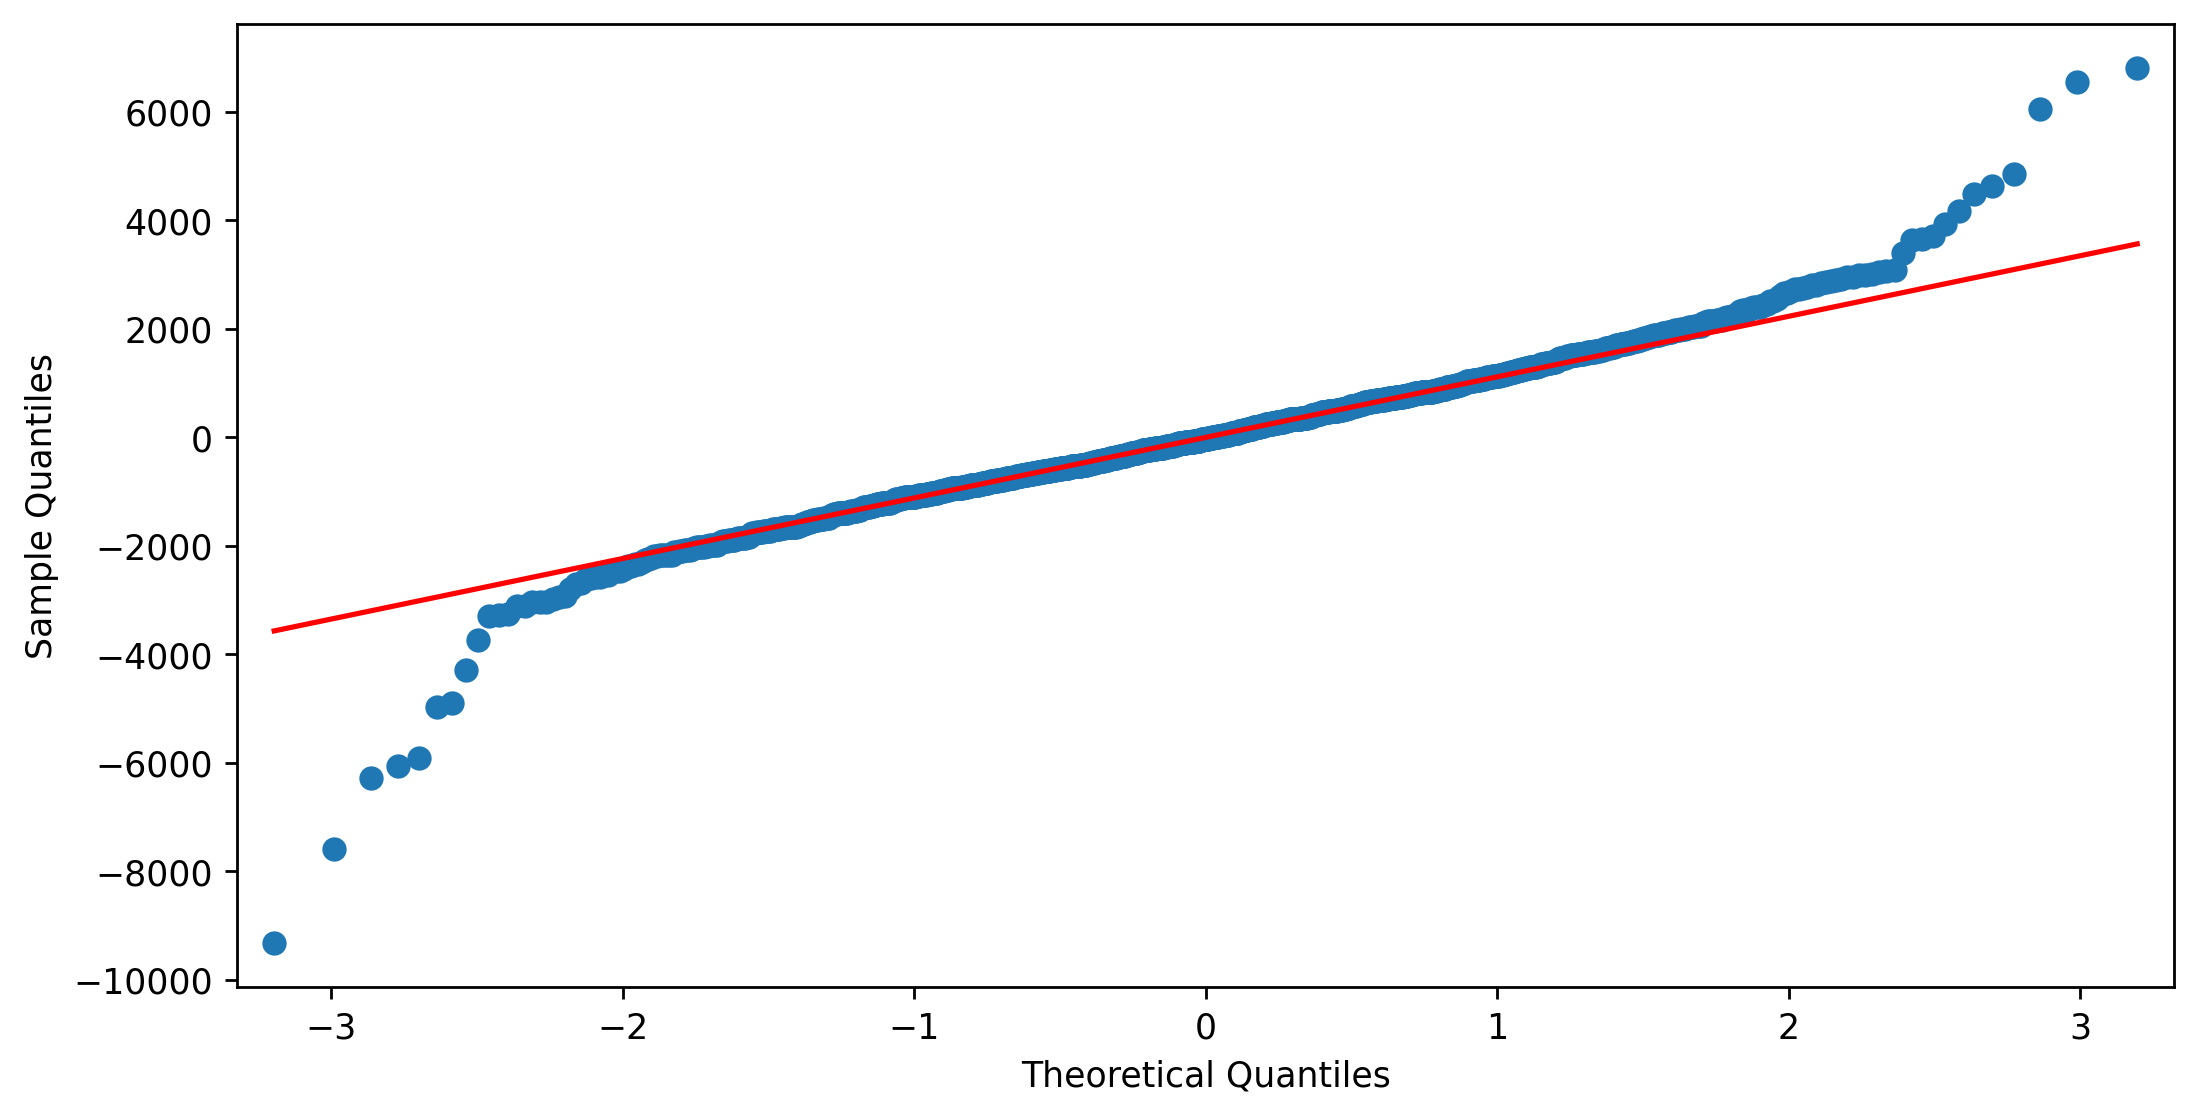

In [39]:
#Plotting the QQ plot ##Normality Test##
sm.qqplot(model.resid, line='q');

In [40]:
np.where(model.resid < -6000)

(array([191, 220, 600, 959], dtype=int64),)

In [41]:
np.where(model.resid > 6000)

(array([109, 146, 522], dtype=int64),)

Text(0, 0.5, 'Fitted Values')

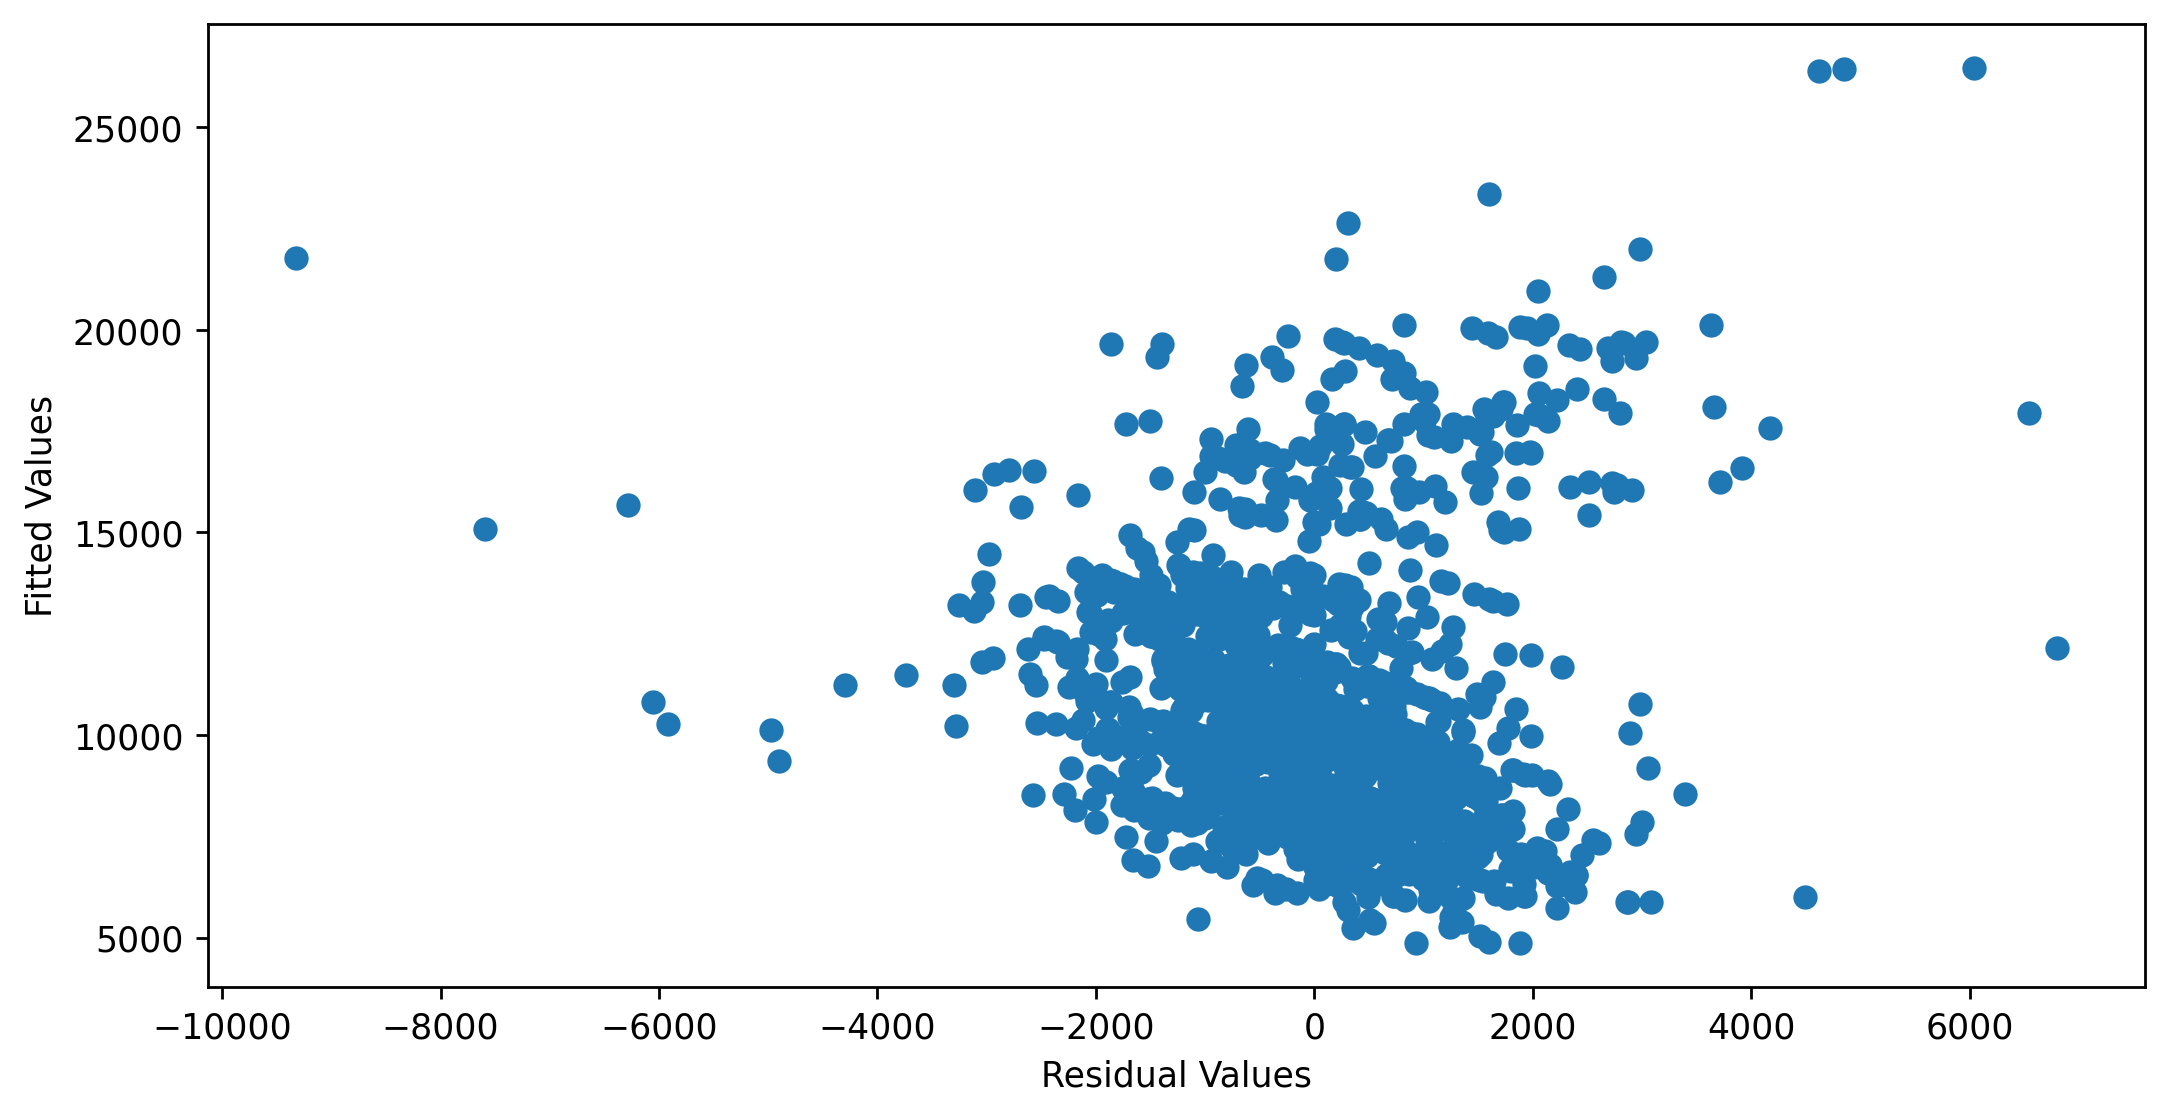

In [42]:
#Testing for Homoscedasticity ##NO Pattern Required##
#ScatterPlot for residual vs fitted values
plt.scatter(model.resid, model.fittedvalues)
plt.xlabel('Residual Values')
plt.ylabel('Fitted Values')

In [43]:
# Pattern is found therefore something is wrong with Model

In [44]:
# Plotting Residual vs Regressor graphs.
# To calculate the test errors in the we use Residual Regressors Graph to plot the graph.

eval_env: 1


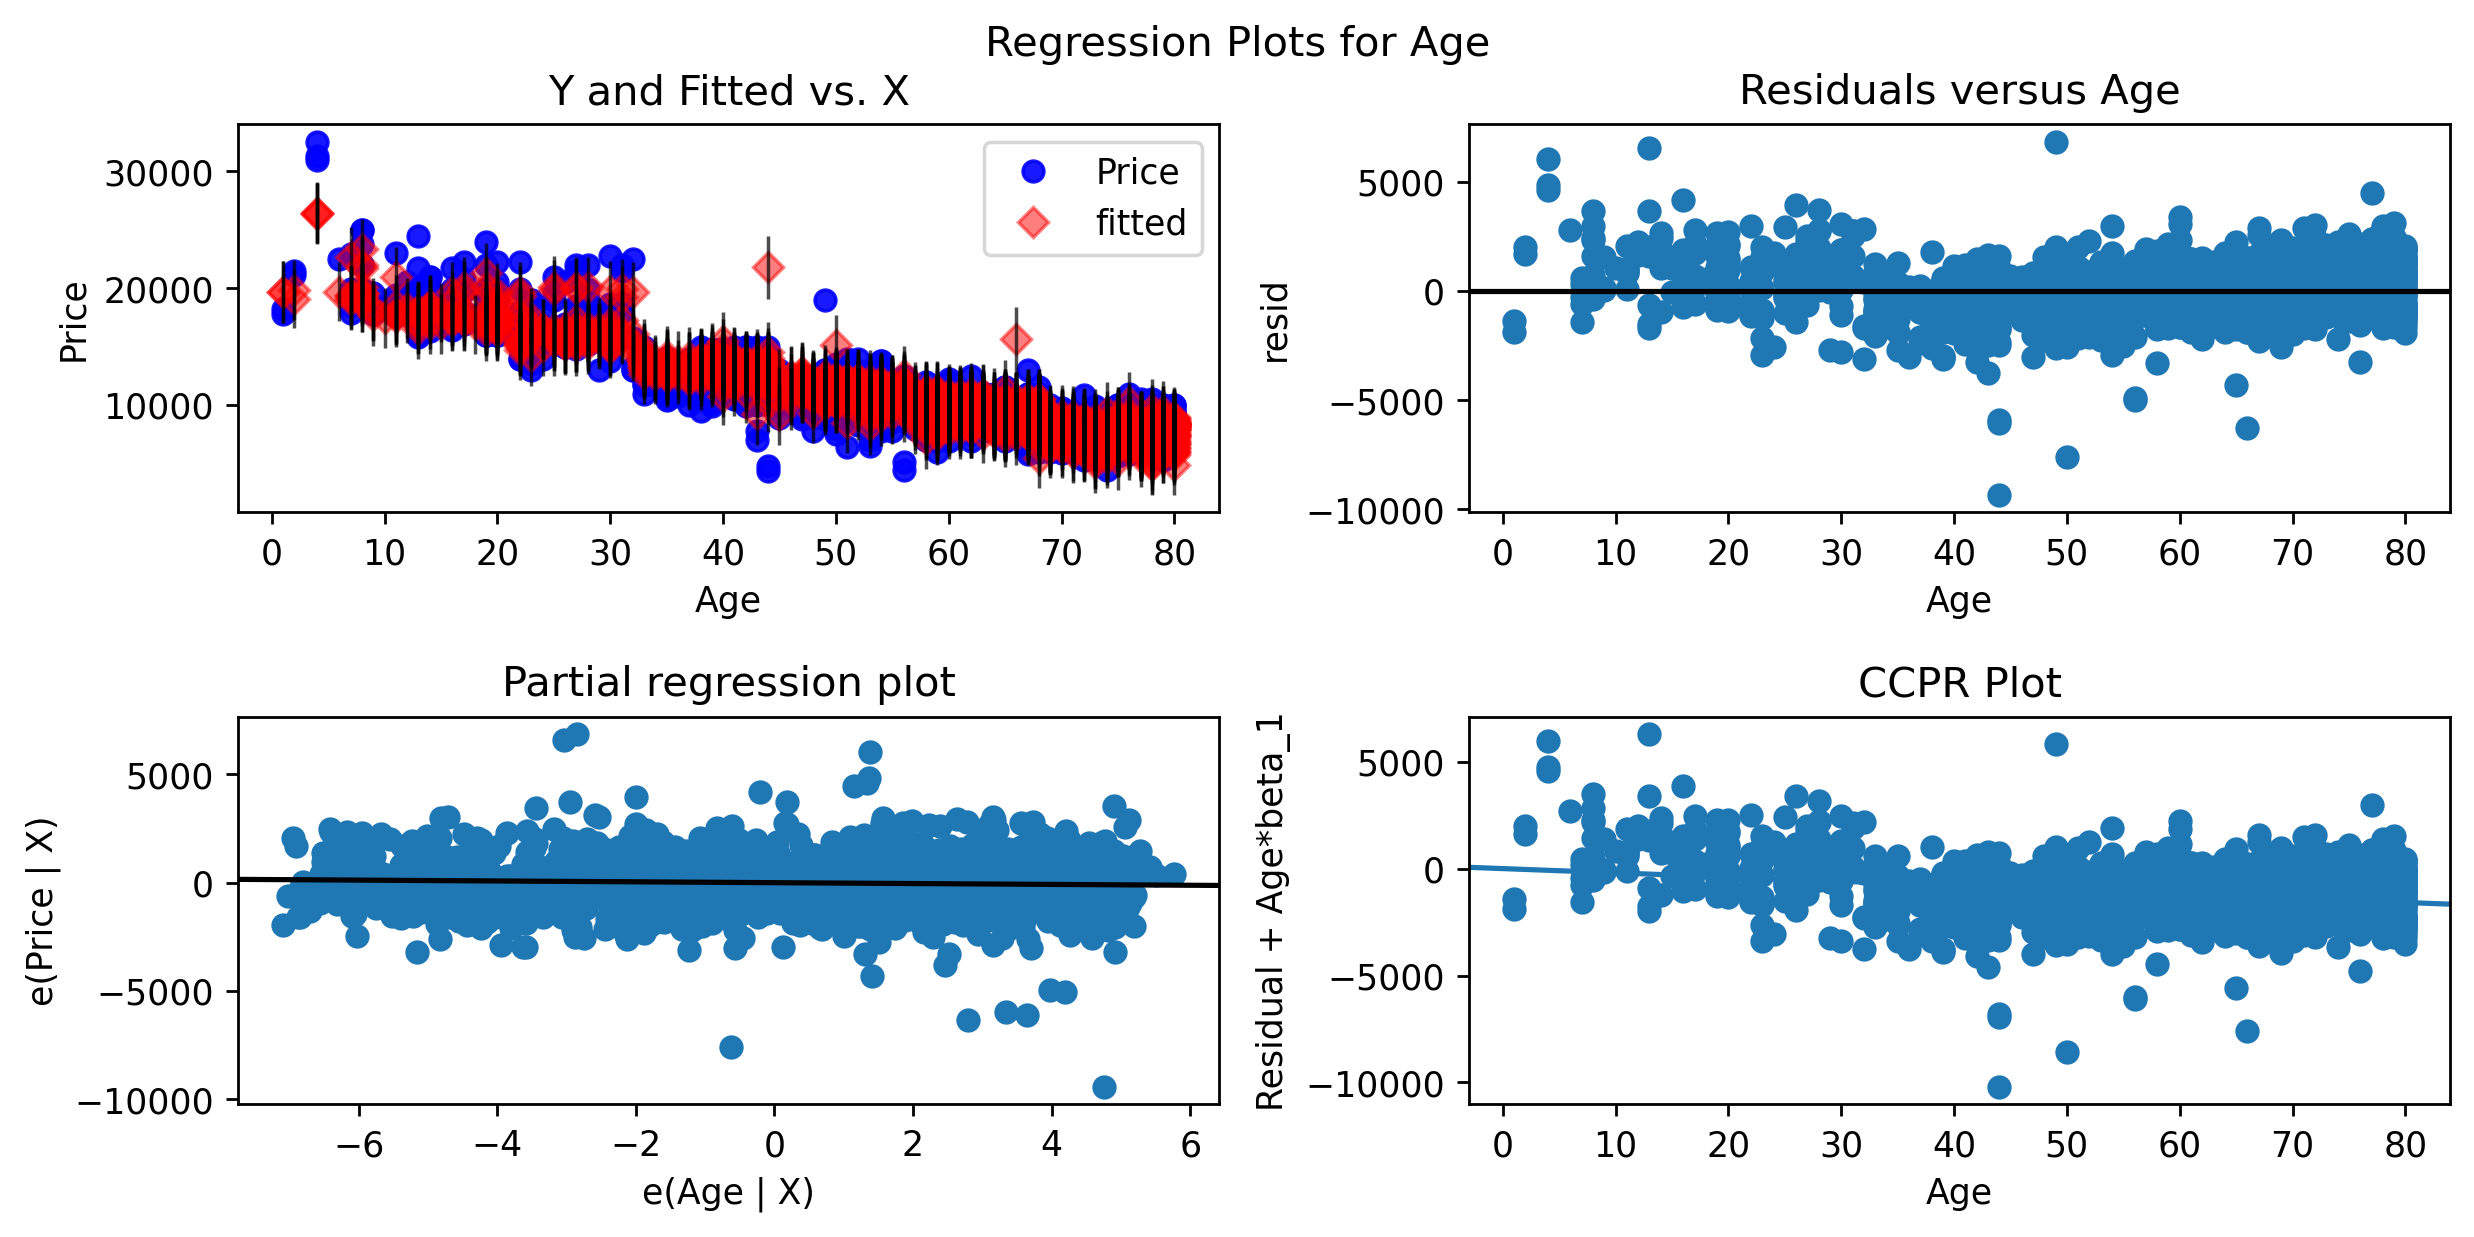

In [45]:
#For Age Column
sm.graphics.plot_regress_exog(model, 'Age');

eval_env: 1


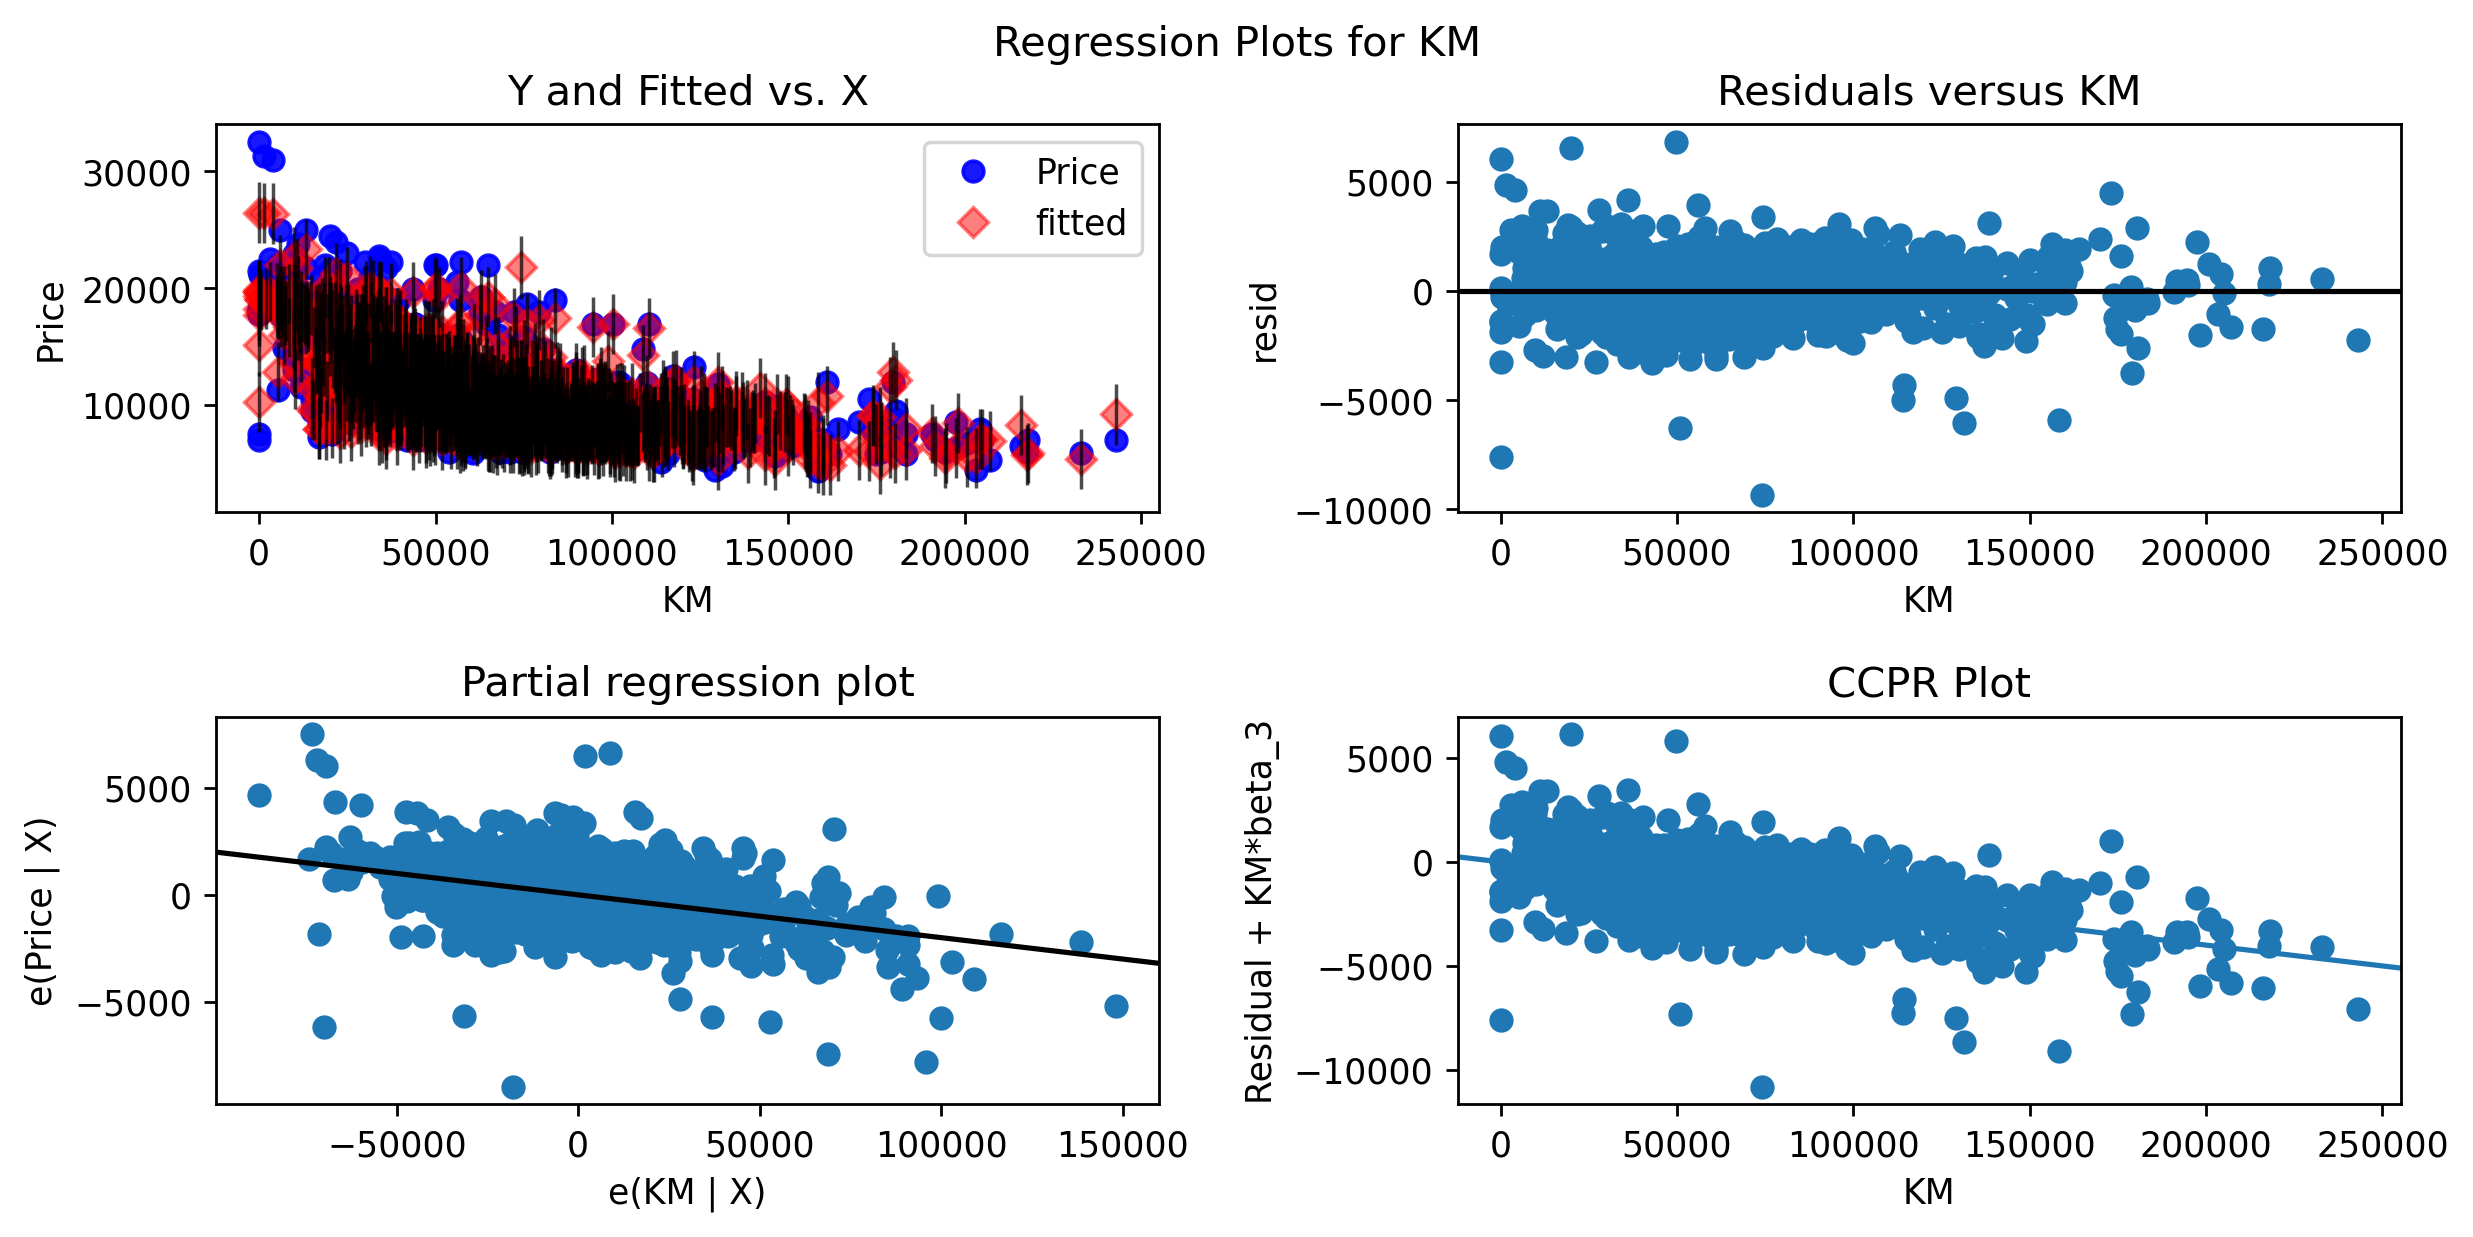

In [46]:
#For KM
sm.graphics.plot_regress_exog(model, 'KM');

eval_env: 1


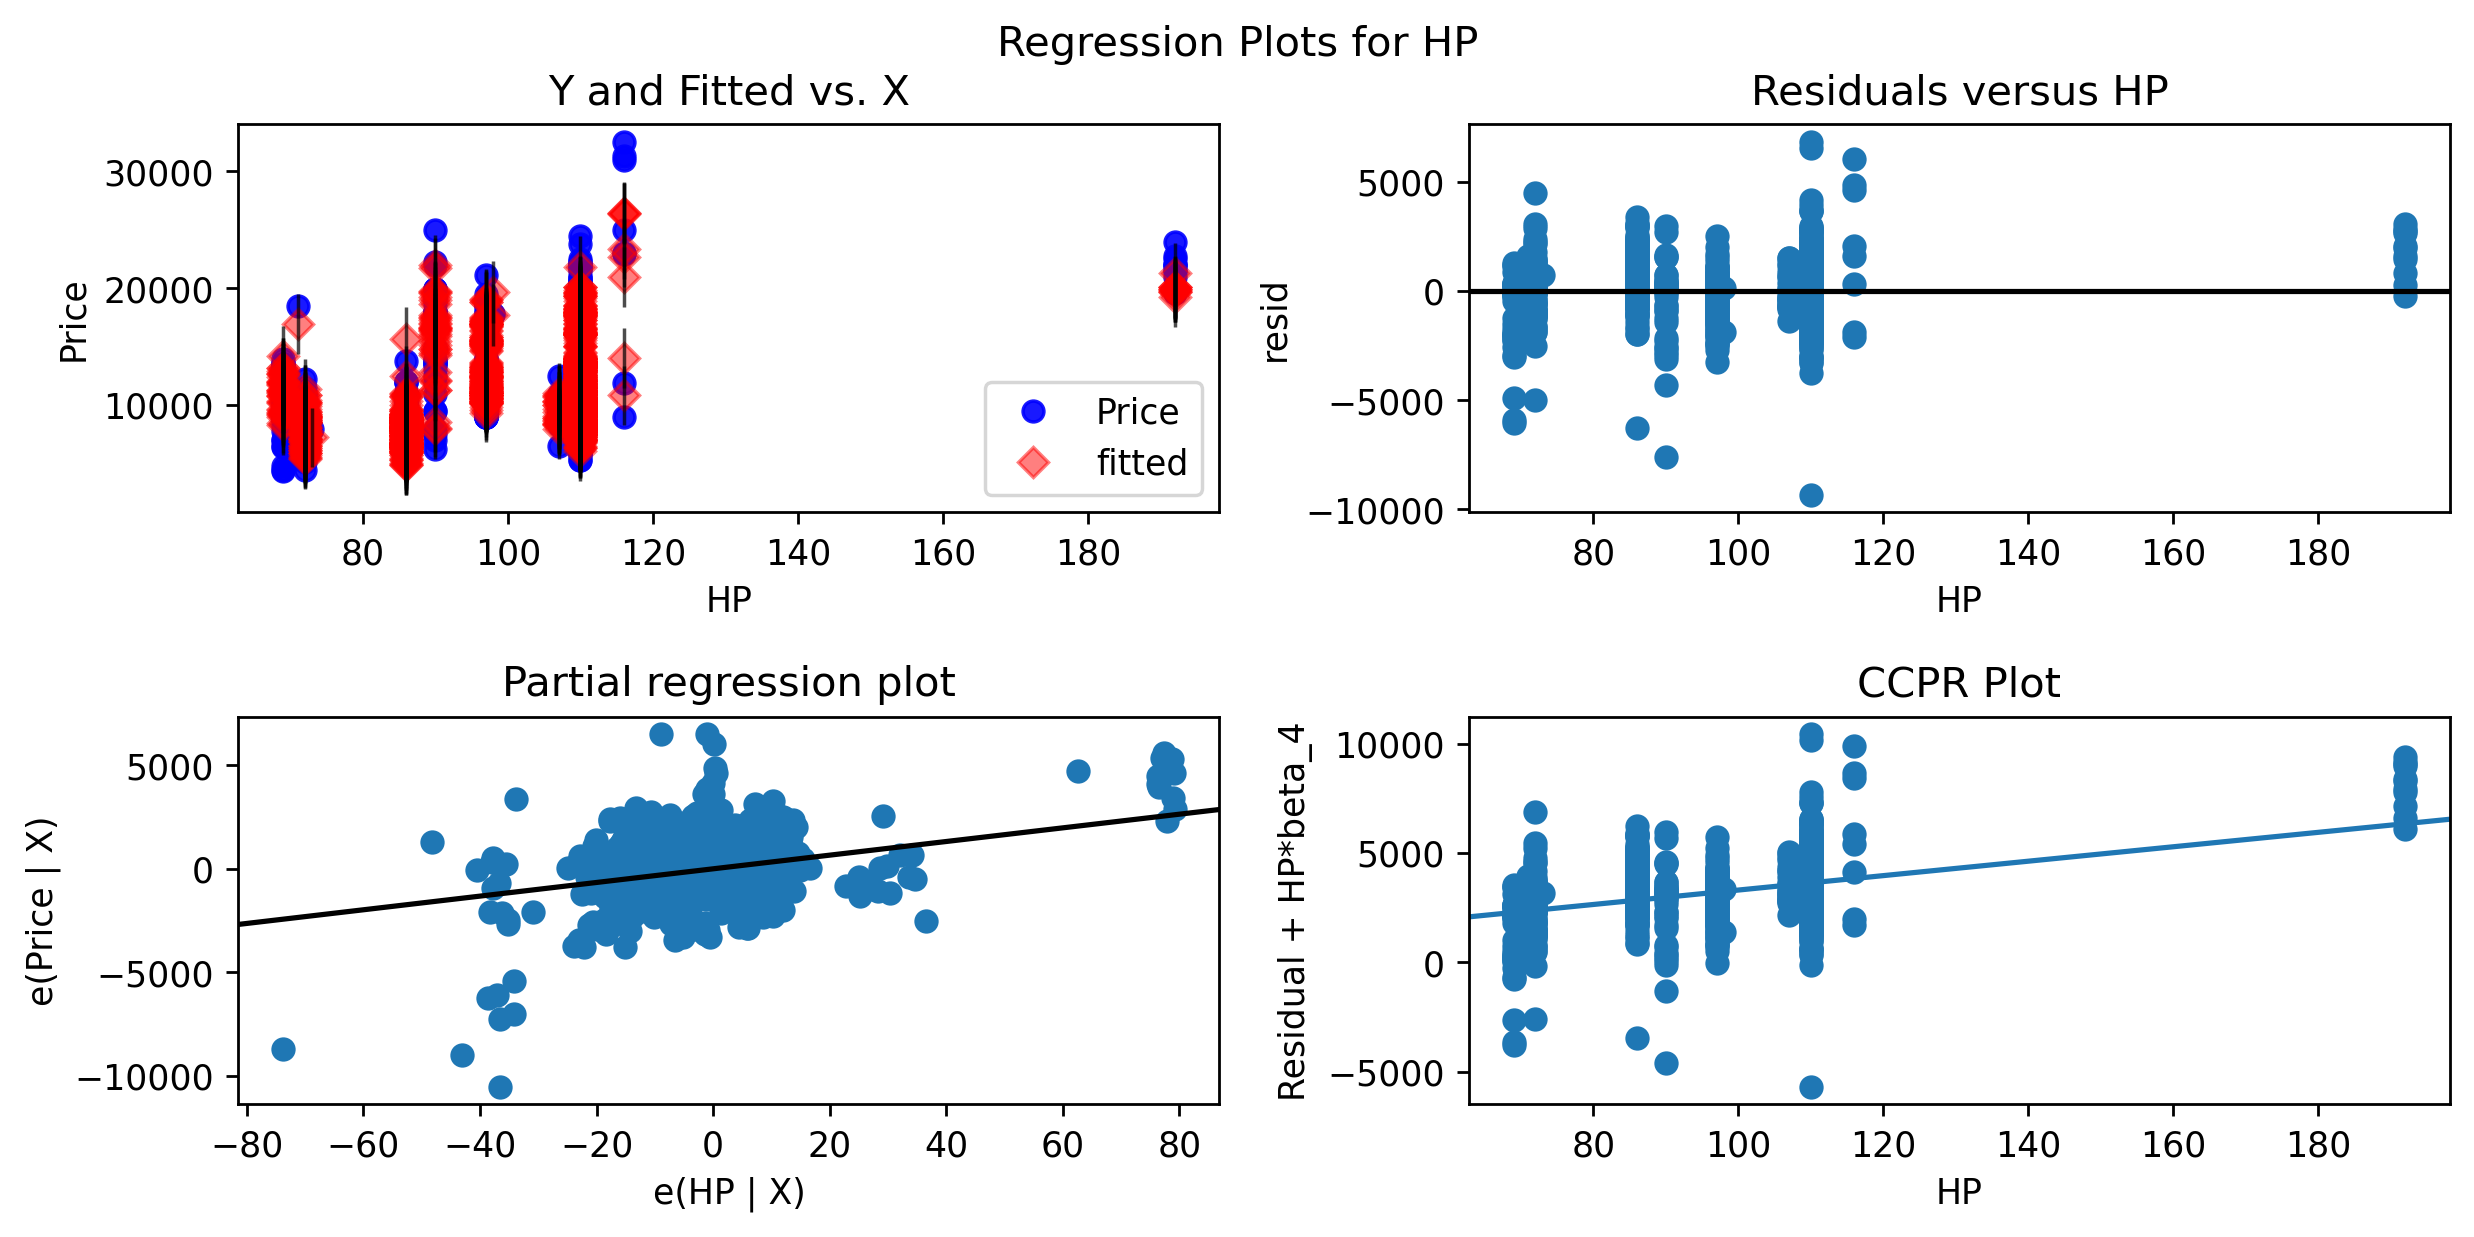

In [47]:
#For HP
sm.graphics.plot_regress_exog(model, 'HP');

eval_env: 1


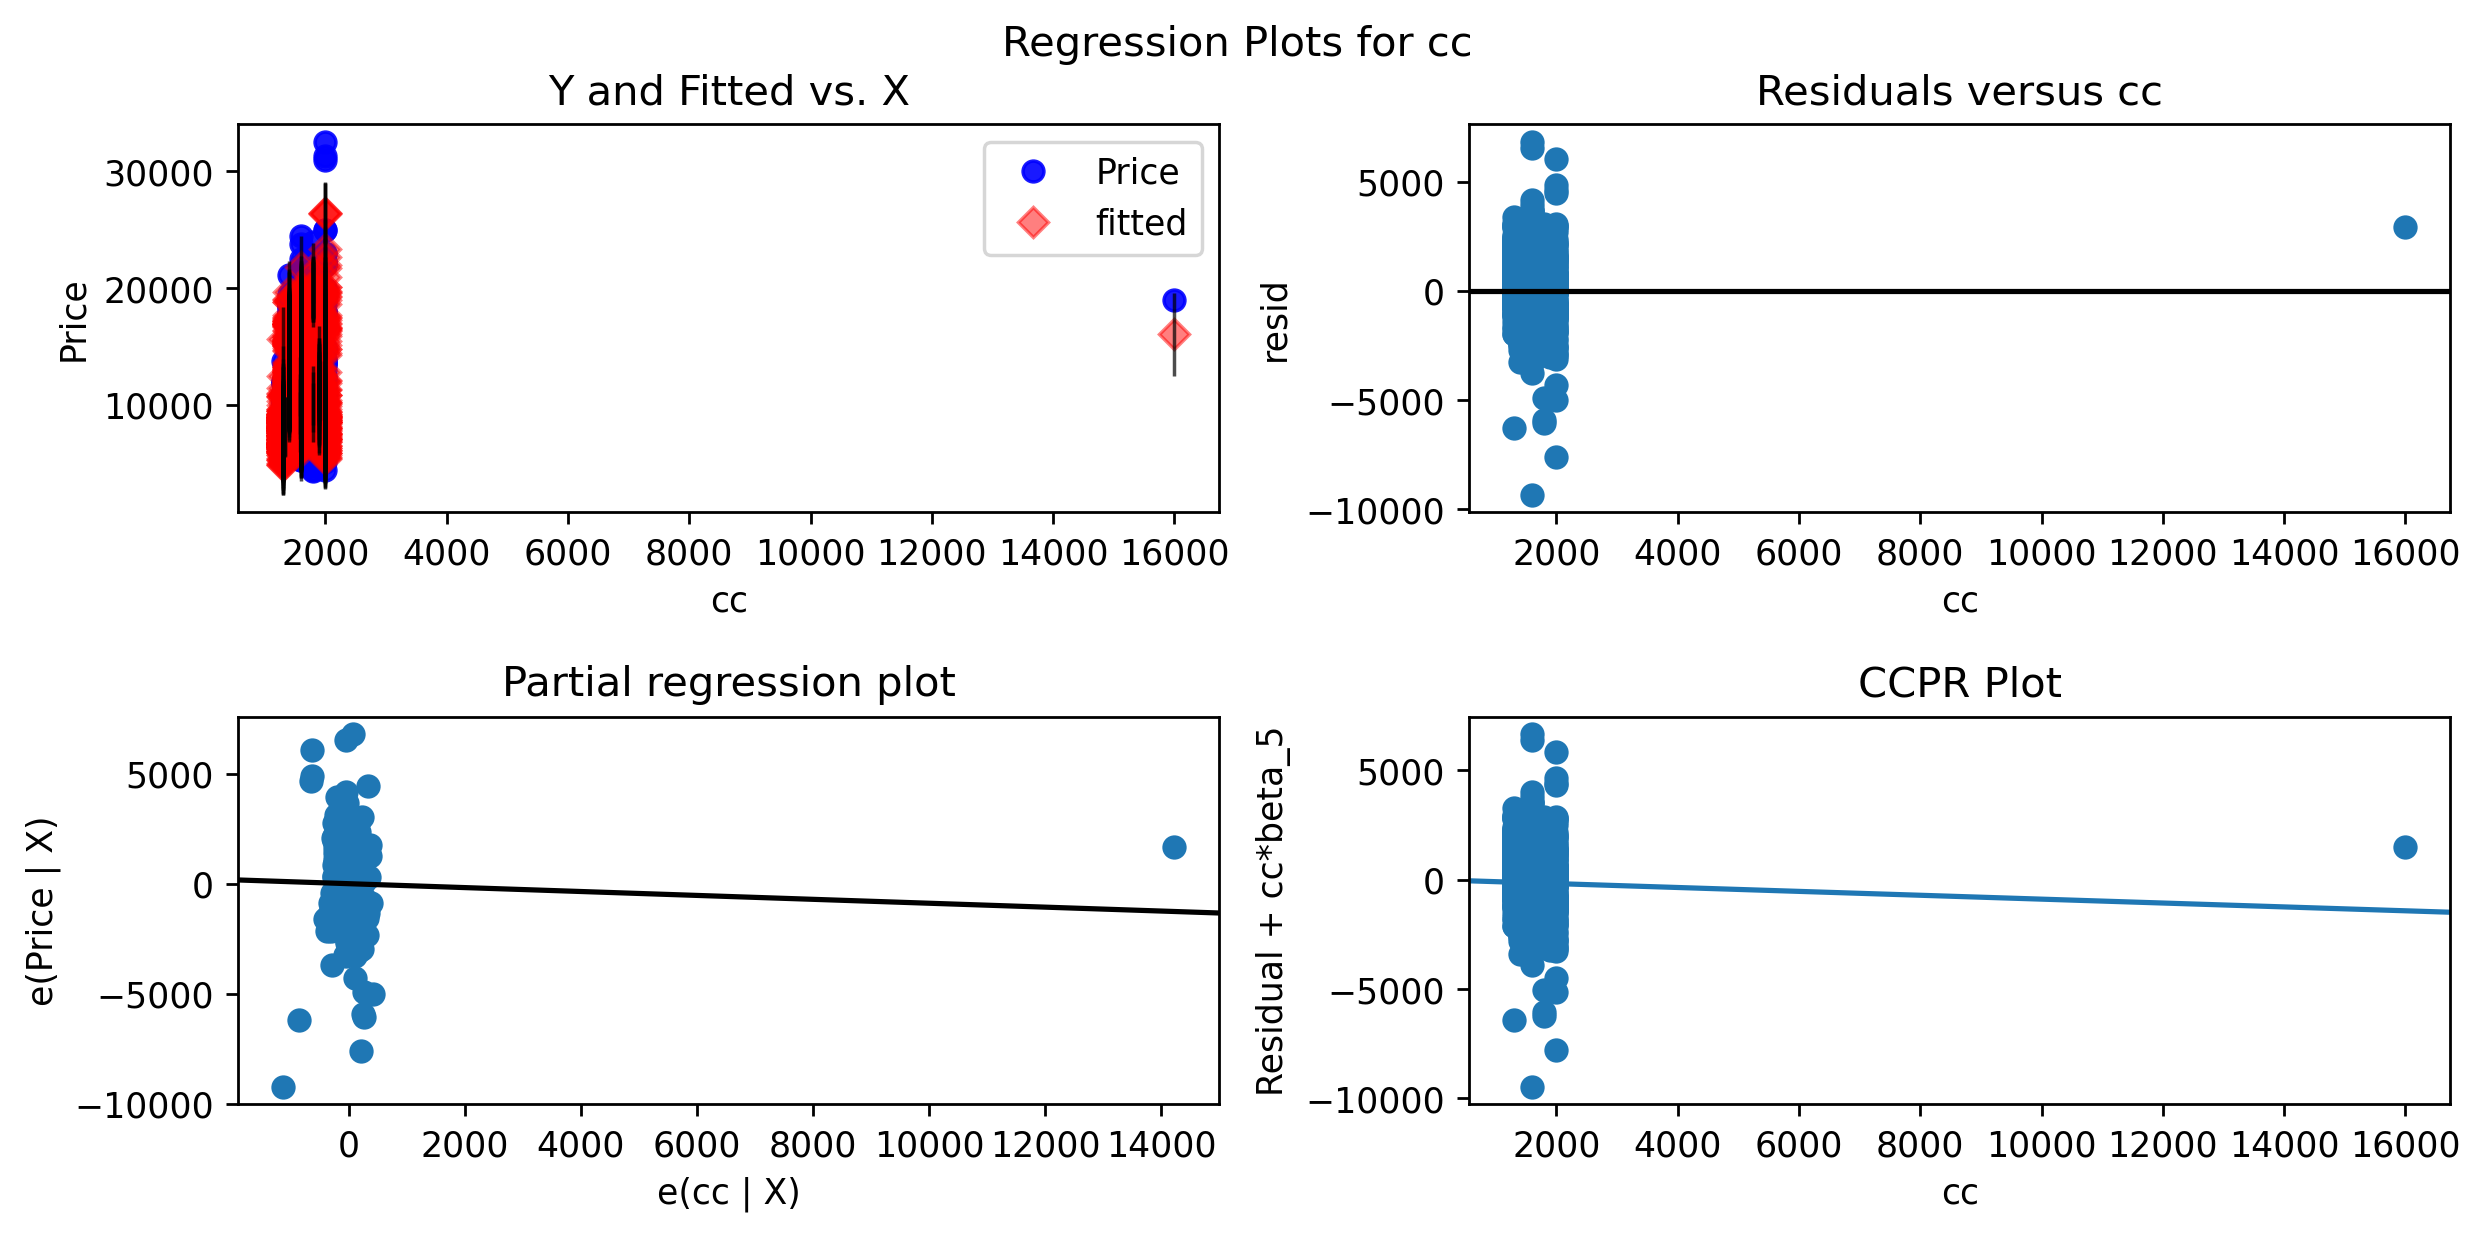

In [48]:
#For CC
sm.graphics.plot_regress_exog(model, 'cc');

eval_env: 1


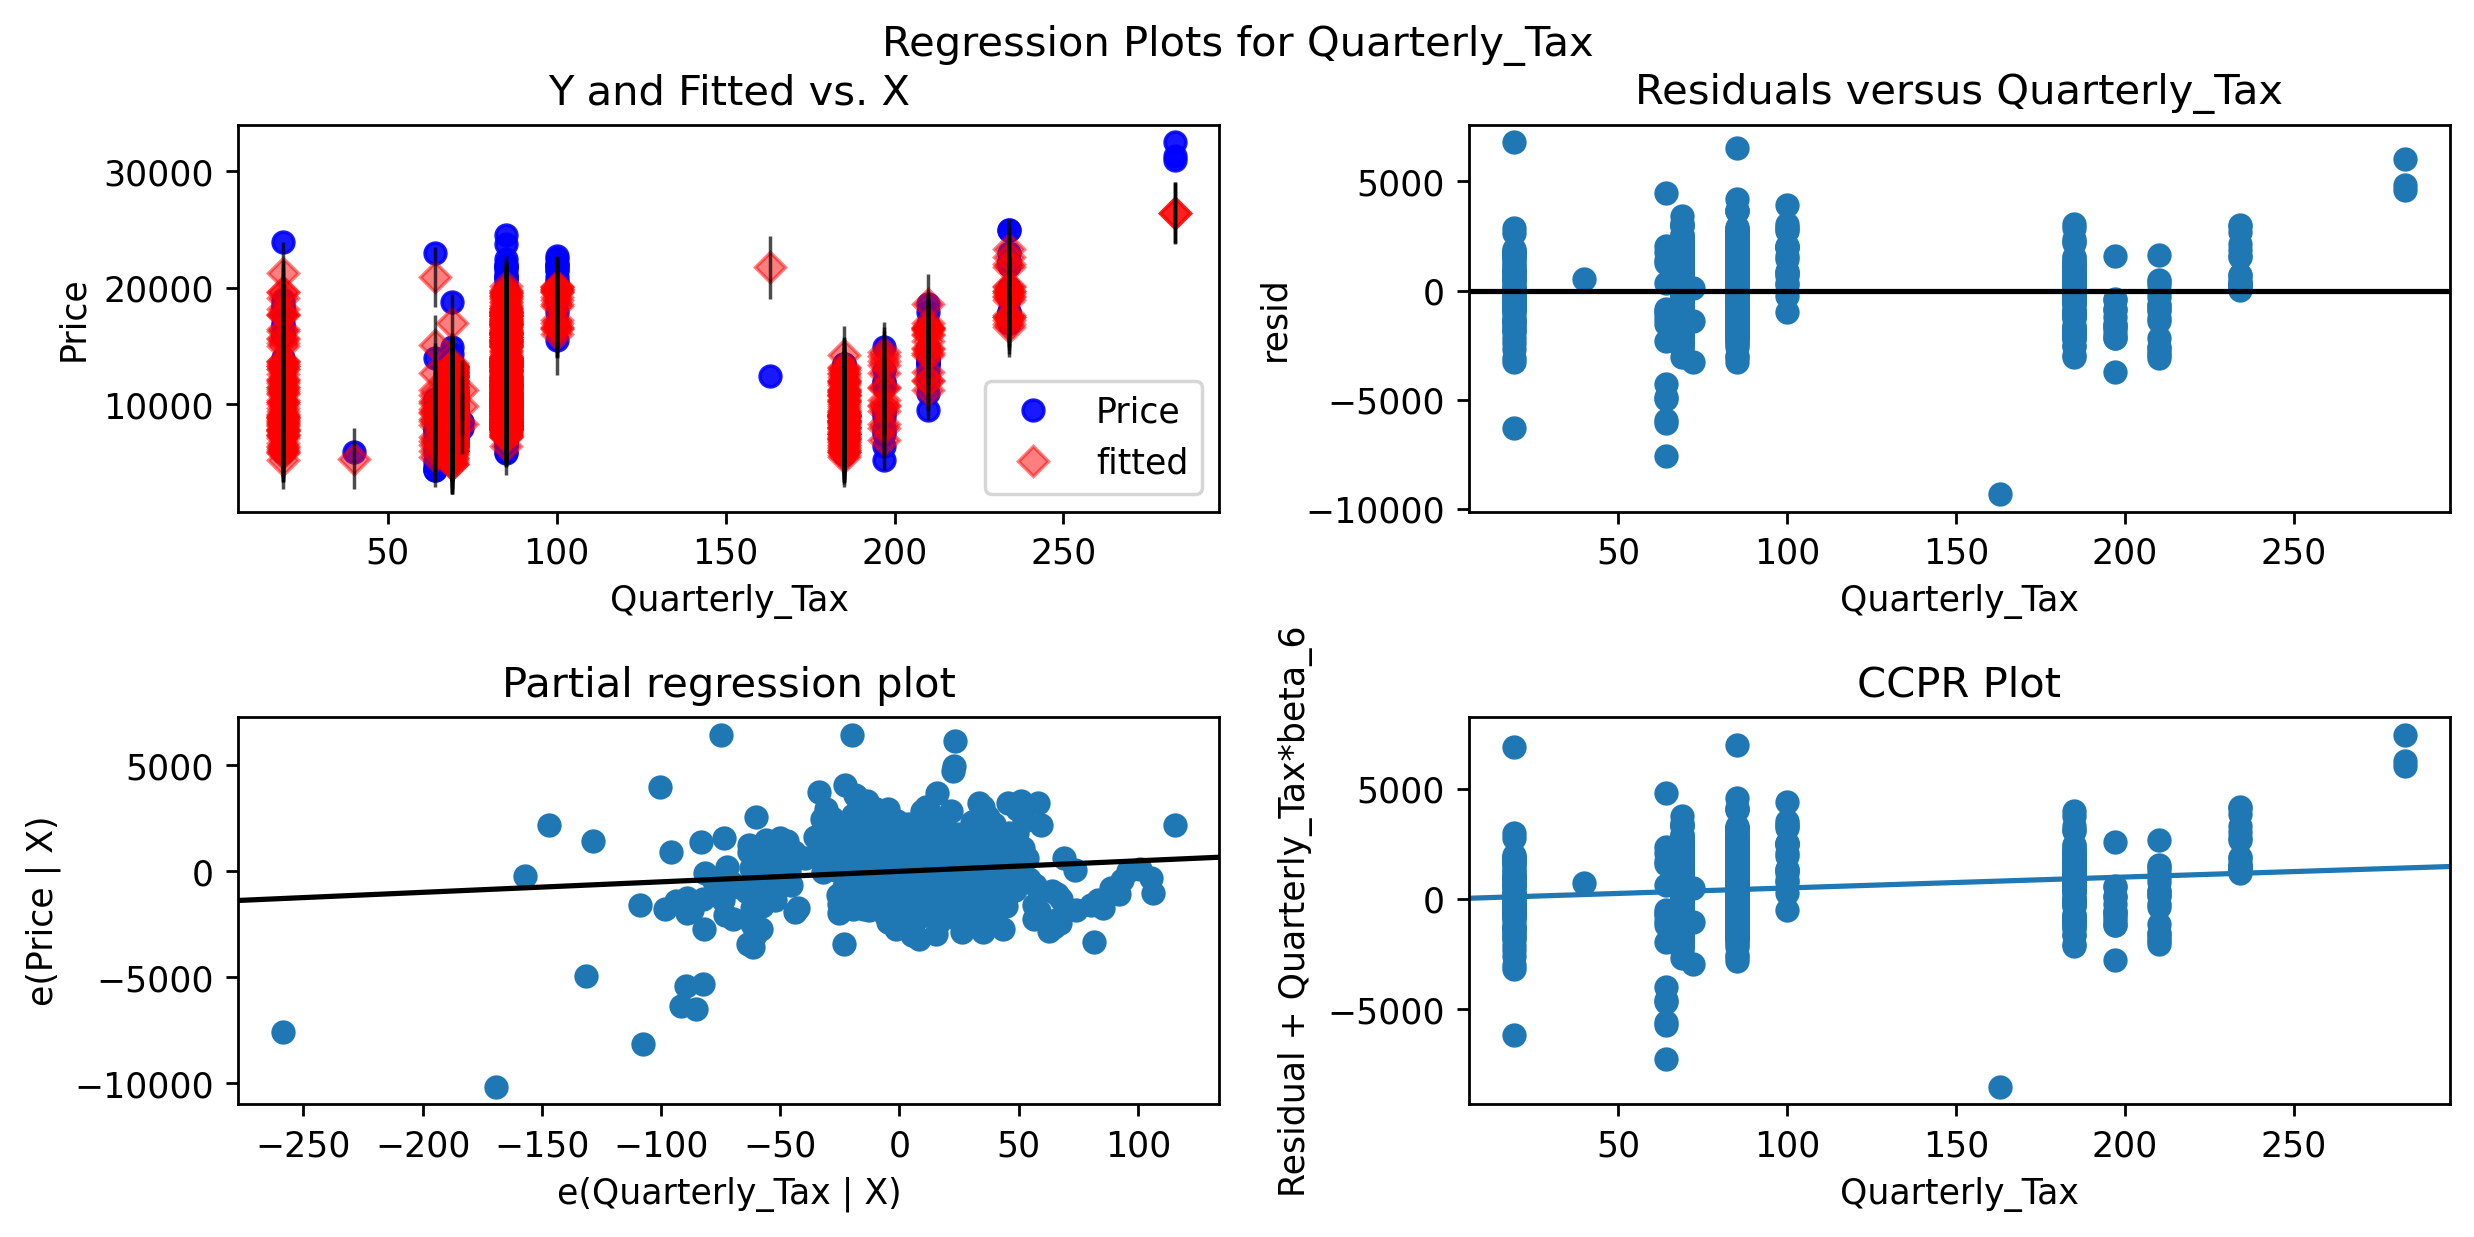

In [49]:
#For Quarterly Tax
sm.graphics.plot_regress_exog(model, 'Quarterly_Tax');

eval_env: 1


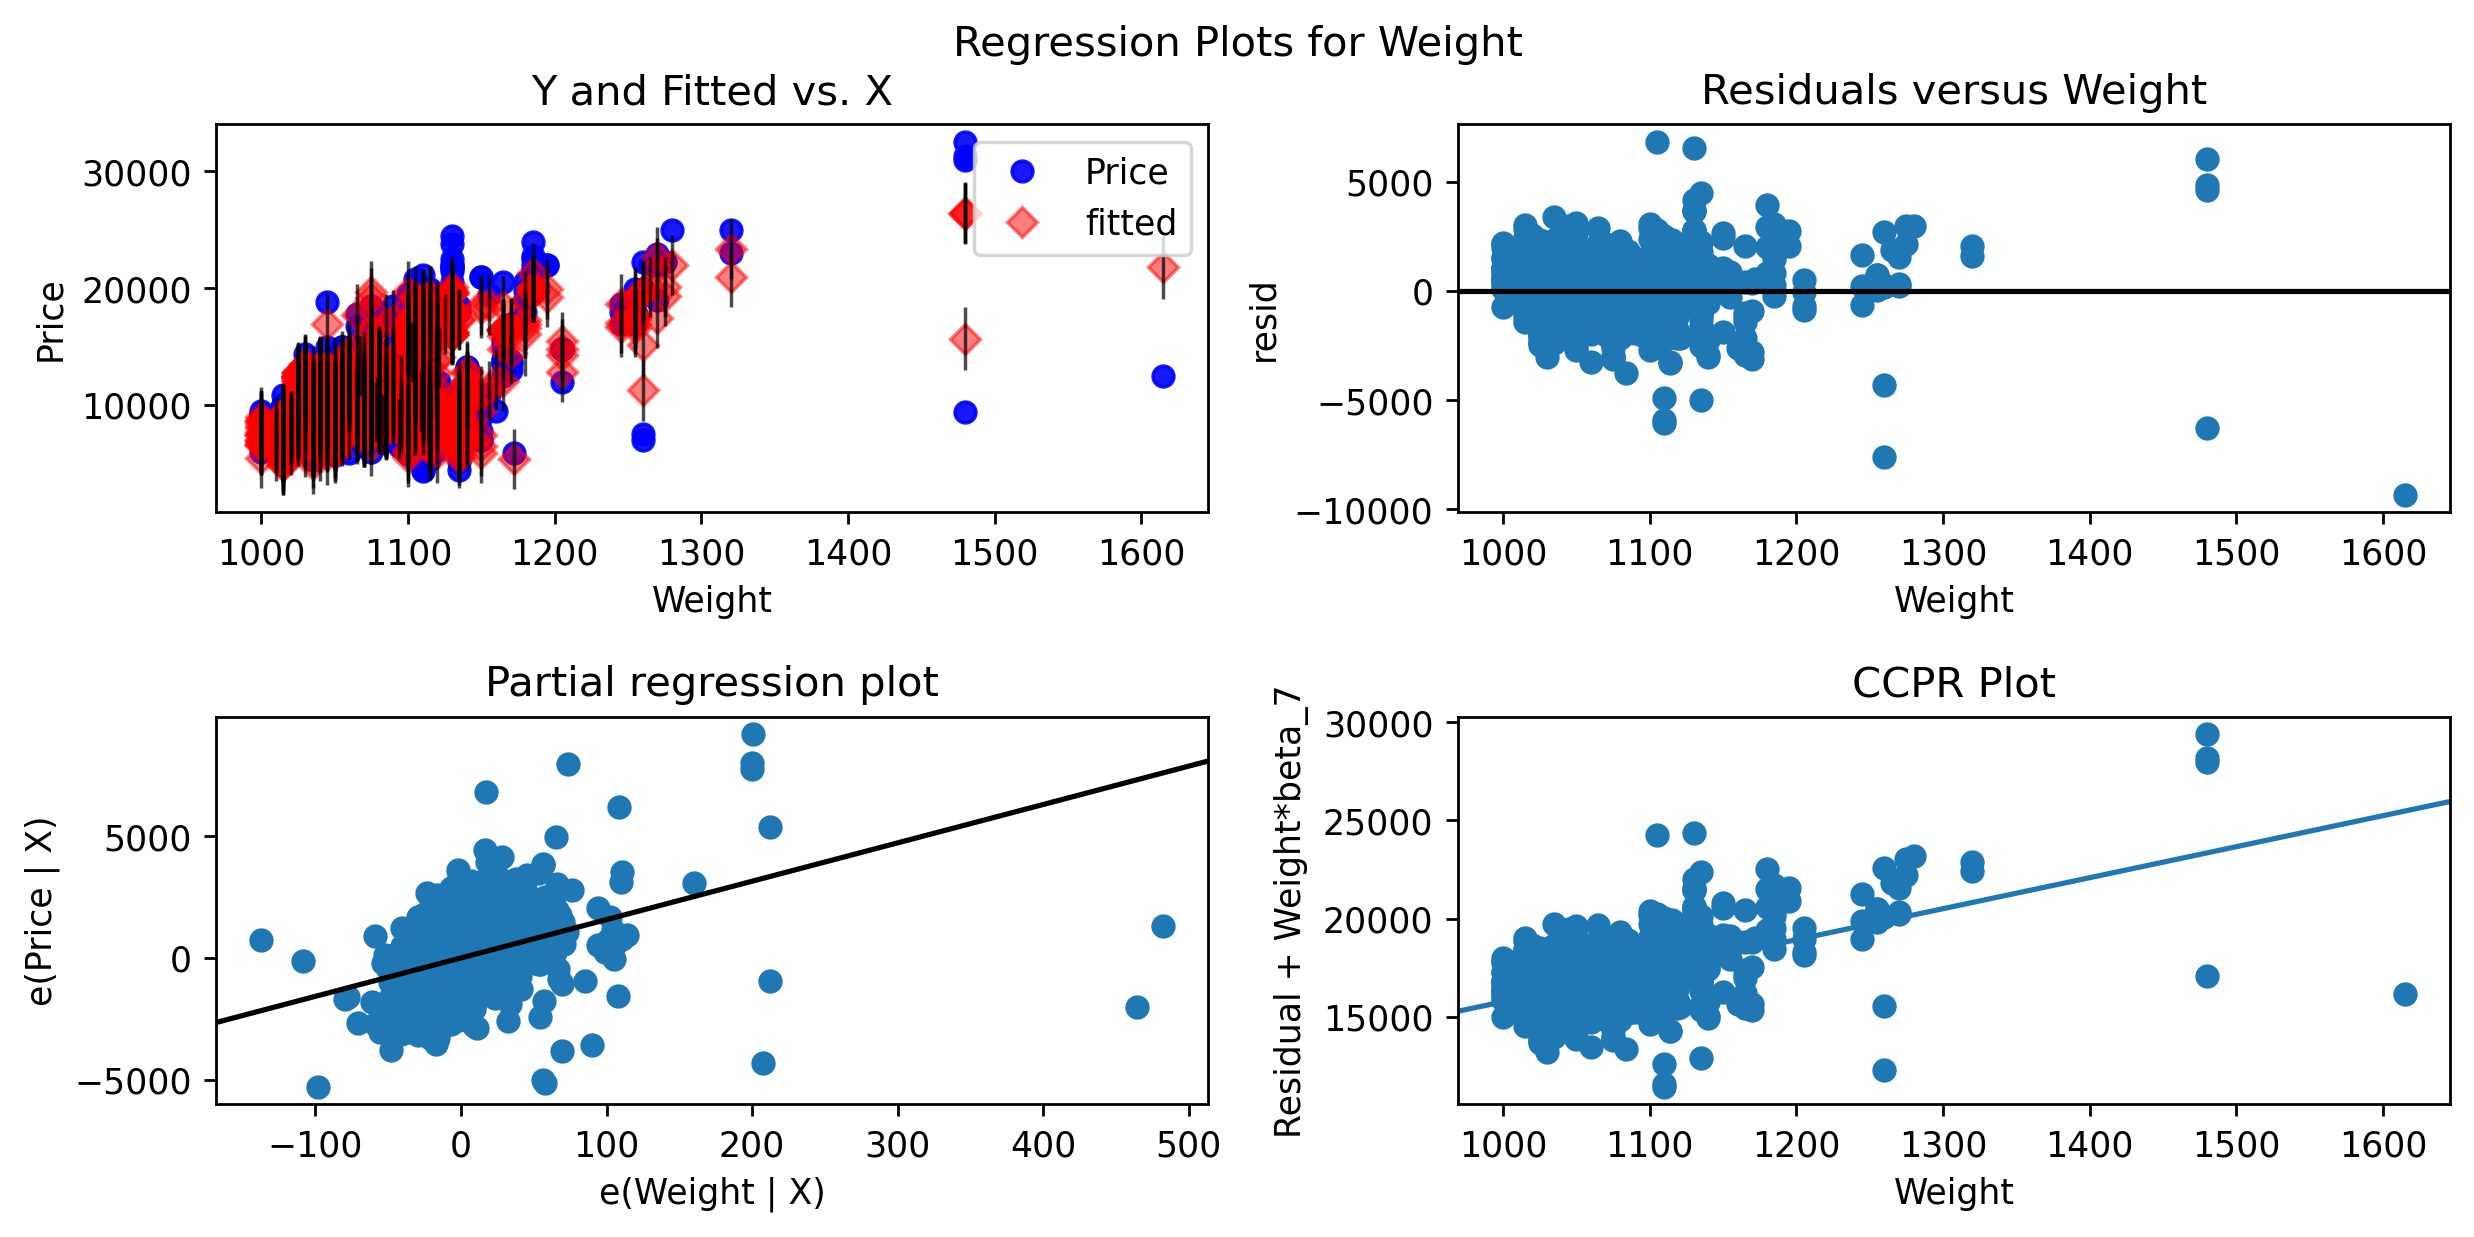

In [50]:
#For Weight
sm.graphics.plot_regress_exog(model, 'Weight');

eval_env: 1


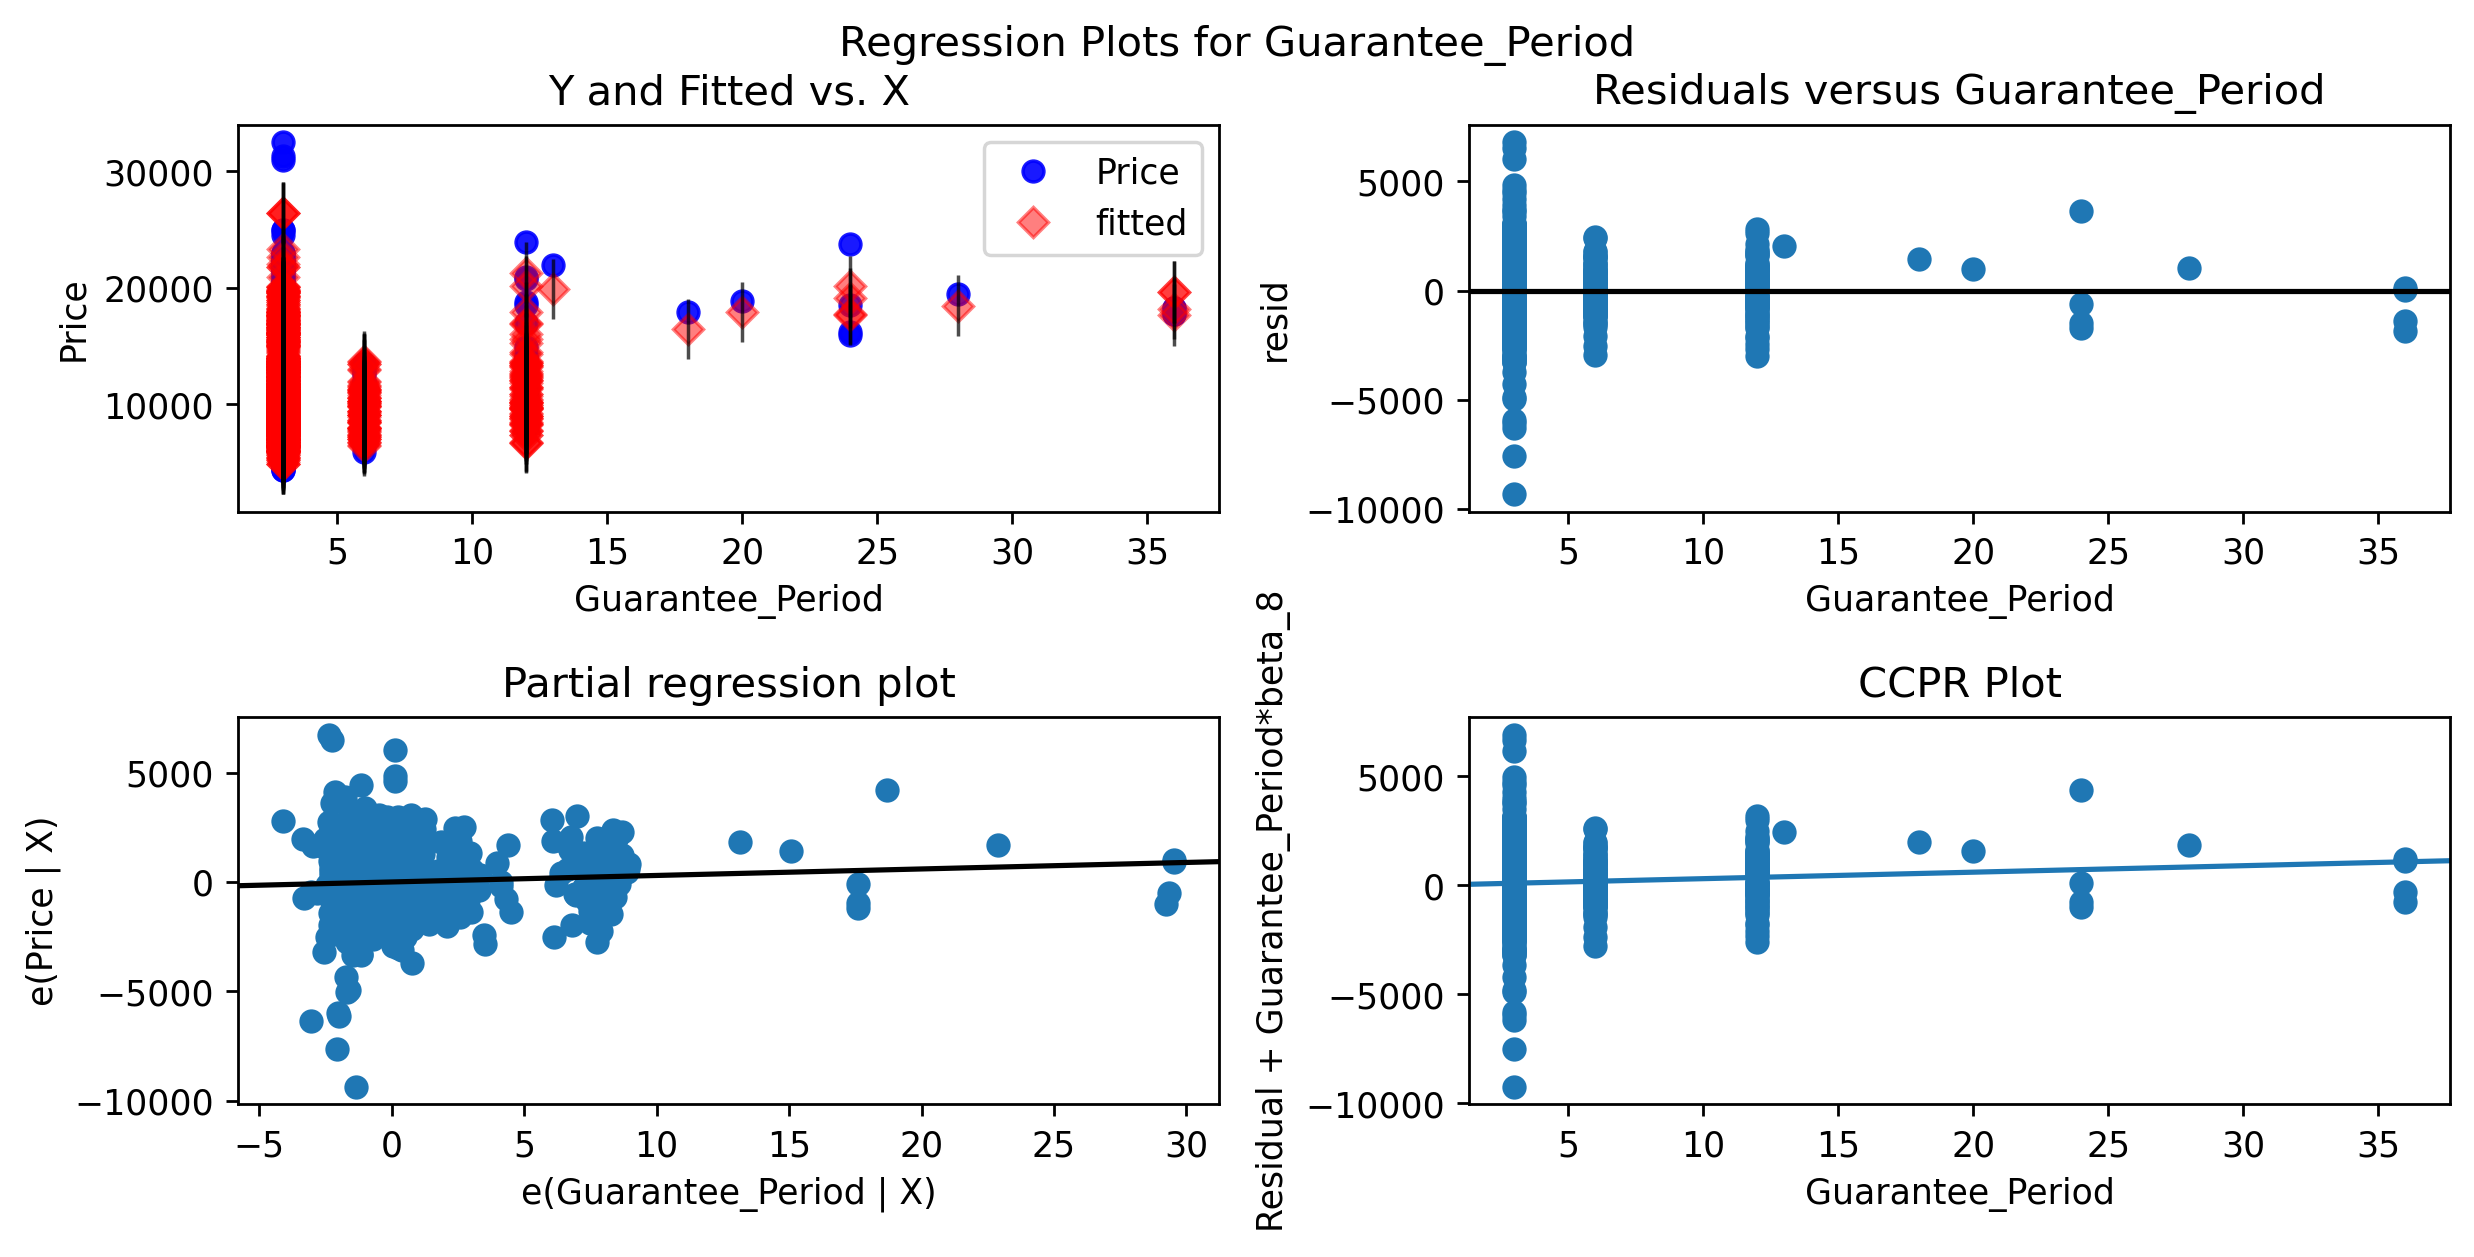

In [51]:
#For Guarantee Period
sm.graphics.plot_regress_exog(model, 'Guarantee_Period');

# Model Deletion and Checking for outliers present in the data.

Using Cooks Distance we detect influence points.

In [52]:
inf = model.get_influence()
c,p = inf.cooks_distance
c

array([0.00570951, 0.00288523, 0.00431511, ..., 0.00018027, 0.00025073,
       0.01048139])

<StemContainer object of 3 artists>

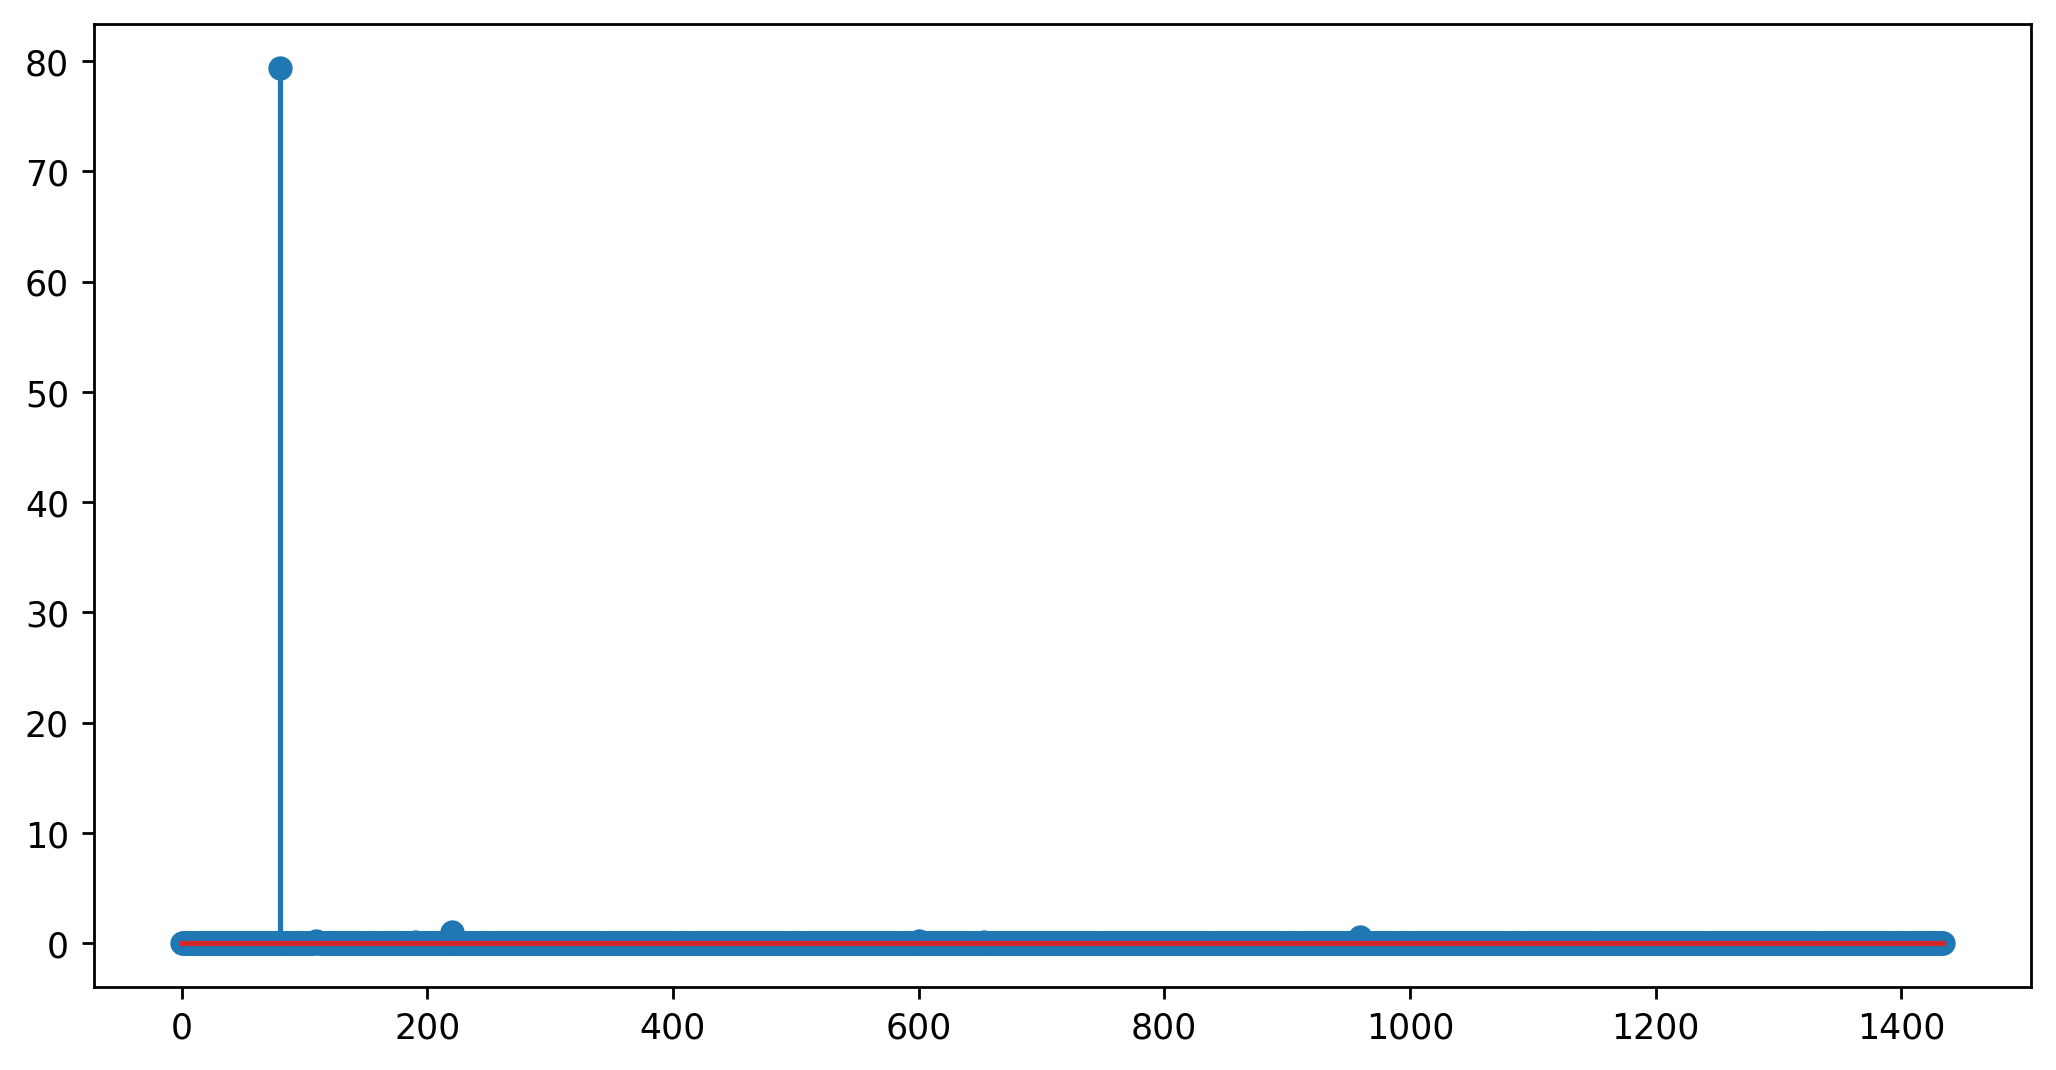

In [53]:
# Cook's distance plot
plt.stem(range(len(data)),c)

In [54]:
np.argmax(c), np.max(c)

(80, 79.3893185622074)

In [55]:
from statsmodels.graphics.regressionplots import influence_plot

In [56]:
#Calculate cutoff

k = len(data.columns)
n = len(data)

cut_off = 3*(k+1)/n
cut_off

0.020905923344947737

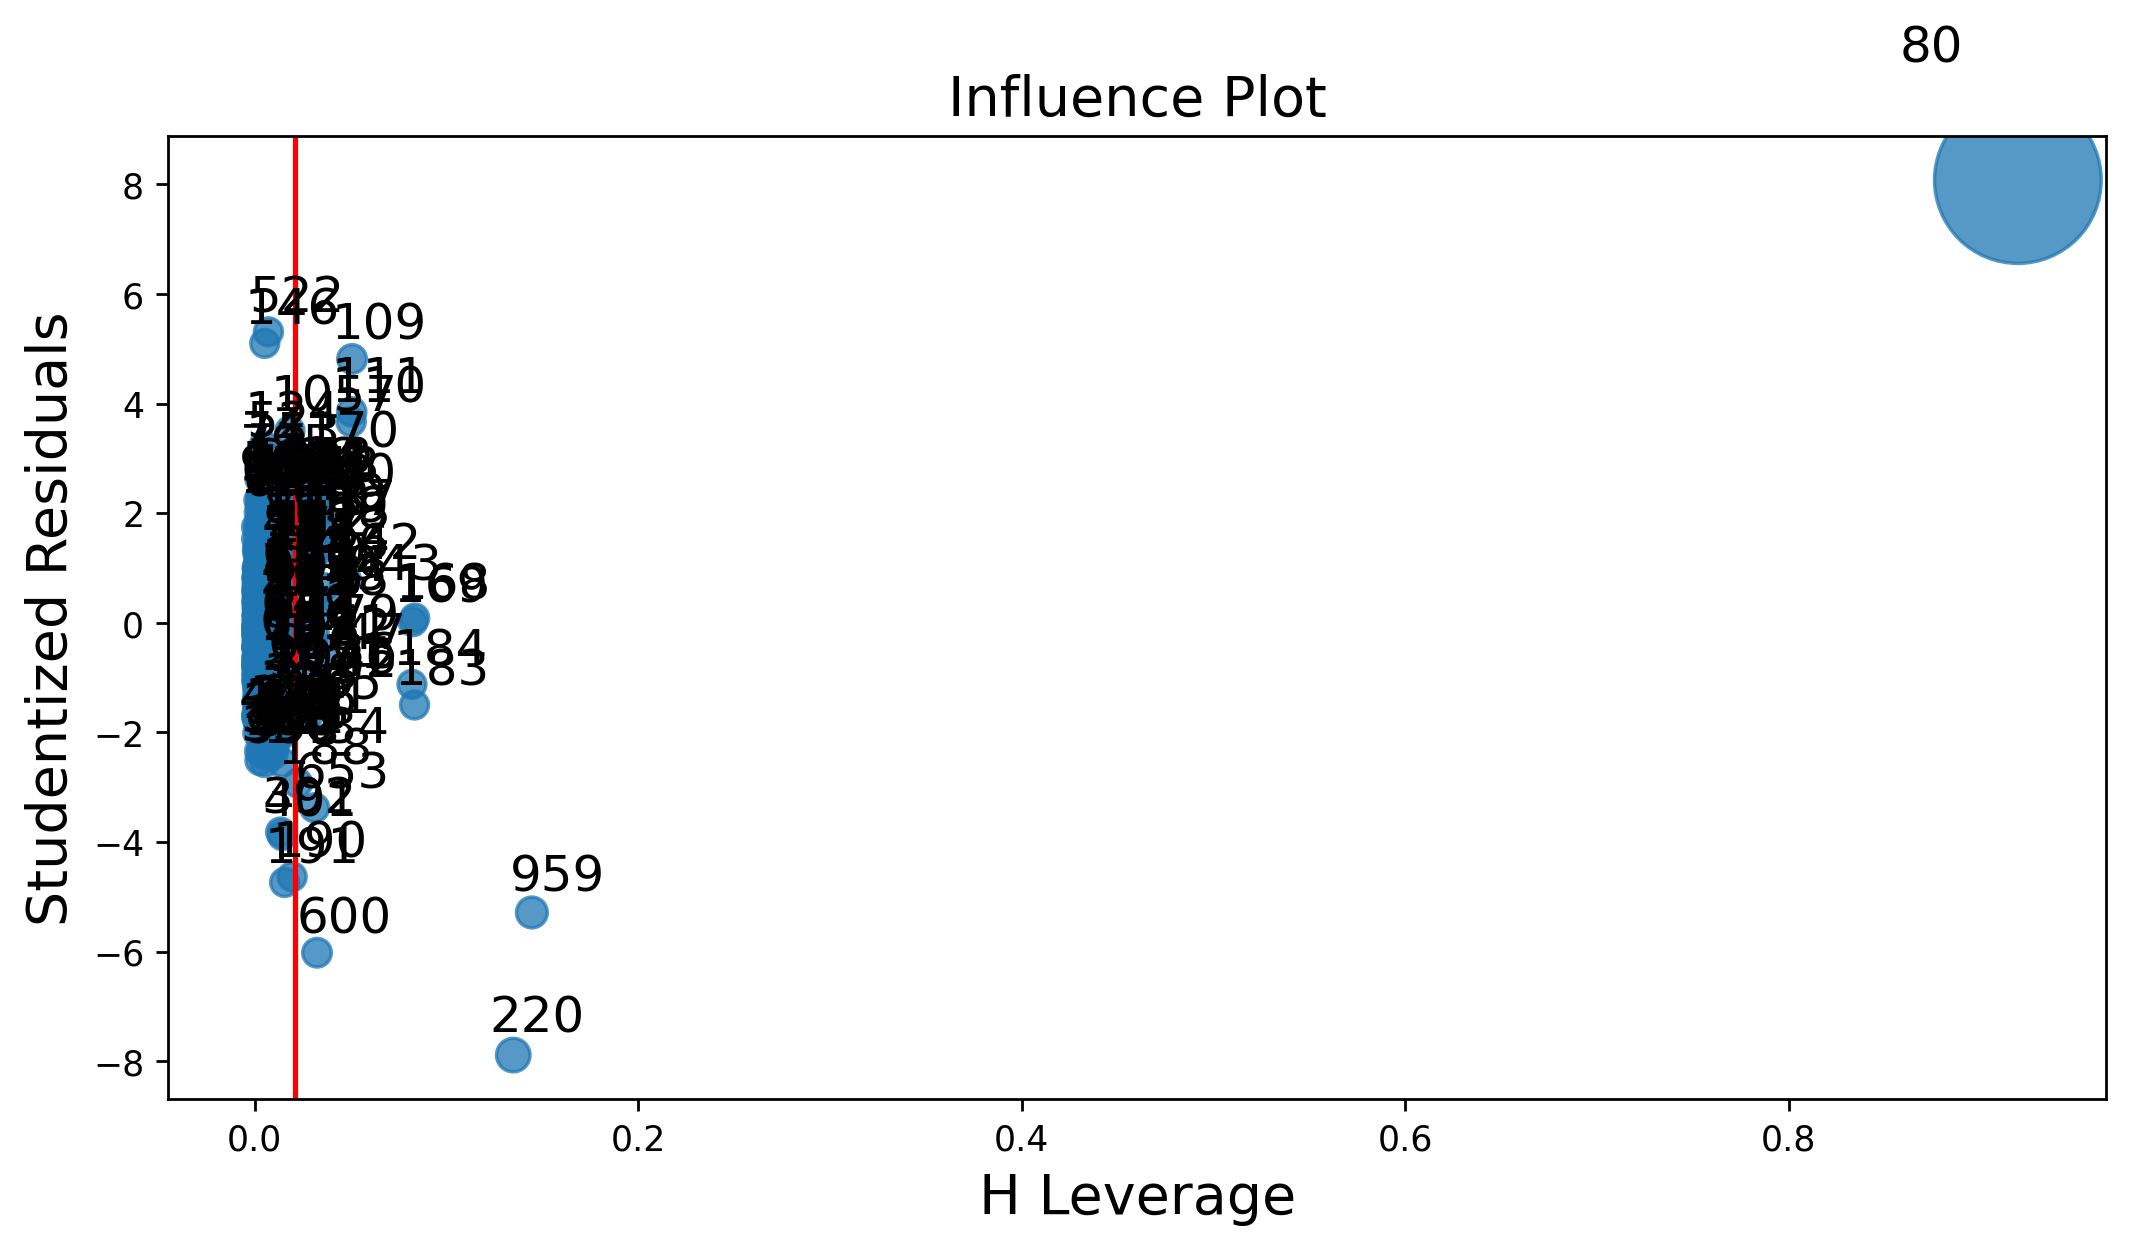

In [57]:
influence_plot(model);
plt.axvline(cut_off, color = 'r')

In [58]:
#Dropping influence points using index number of that columns.

In [59]:
# took all the points who were found to be influence points.
data[data.index.isin([80,959,220,183,184,600,168,109,111])]

Price  Age  Mfg_Year     KM   HP     cc  Quarterly_Tax  Weight  \
80   18950   25      2002  20019  110  16000            100    1180   
109  32500    4      2004      1  116   2000            283    1480   
111  31275    4      2004   1500  116   2000            283    1480   
168  17795    9      2003      1   98   1400             19    1065   
183  17795    1      2004      1   98   1400             19    1100   
184  18245    1      2004      1  110   1600             19    1075   
220  12450   44      2001  74172  110   1600            163    1615   
600   7500   50      2000      1   90   2000             64    1260   
959   9390   66      1999  50806   86   1300             19    1480   

     Guarantee_Period  
80                  3  
109                 3  
111                 3  
168                36  
183                36  
184                36  
220                 3  
600                 3  
959                 3

In [60]:
data_new =  data.drop(index=[80,959,220,183,184,600,168,109,111], axis=0).reset_index(drop=True)

In [61]:
data_new

Price  Age  Mfg_Year     KM   HP    cc  Quarterly_Tax  Weight  \
0     13500   23      2002  46986   90  2000            210    1165   
1     13750   23      2002  72937   90  2000            210    1165   
2     13950   24      2002  41711   90  2000            210    1165   
3     14950   26      2002  48000   90  2000            210    1165   
4     13750   30      2002  38500   90  2000            210    1170   
...     ...  ...       ...    ...  ...   ...            ...     ...   
1421   7500   69      1998  20544   86  1300             69    1025   
1422  10845   72      1998  19000   86  1300             69    1015   
1423   8500   71      1998  17016   86  1300             69    1015   
1424   7250   70      1998  16916   86  1300             69    1015   
1425   6950   76      1998      1  110  1600             19    1114   

      Guarantee_Period  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
1421                 3  
1422                 3  
1423                 3  
1424                 3  
1425                 3  

[1426 rows x 9 columns]

In [62]:
test_model = smf.ols('Price ~ Age + Mfg_Year + KM + HP + cc + Quarterly_Tax + Weight + Guarantee_Period', data=data_new).fit()


In [63]:
inf = test_model.get_influence()
c,p =inf.cooks_distance

<StemContainer object of 3 artists>

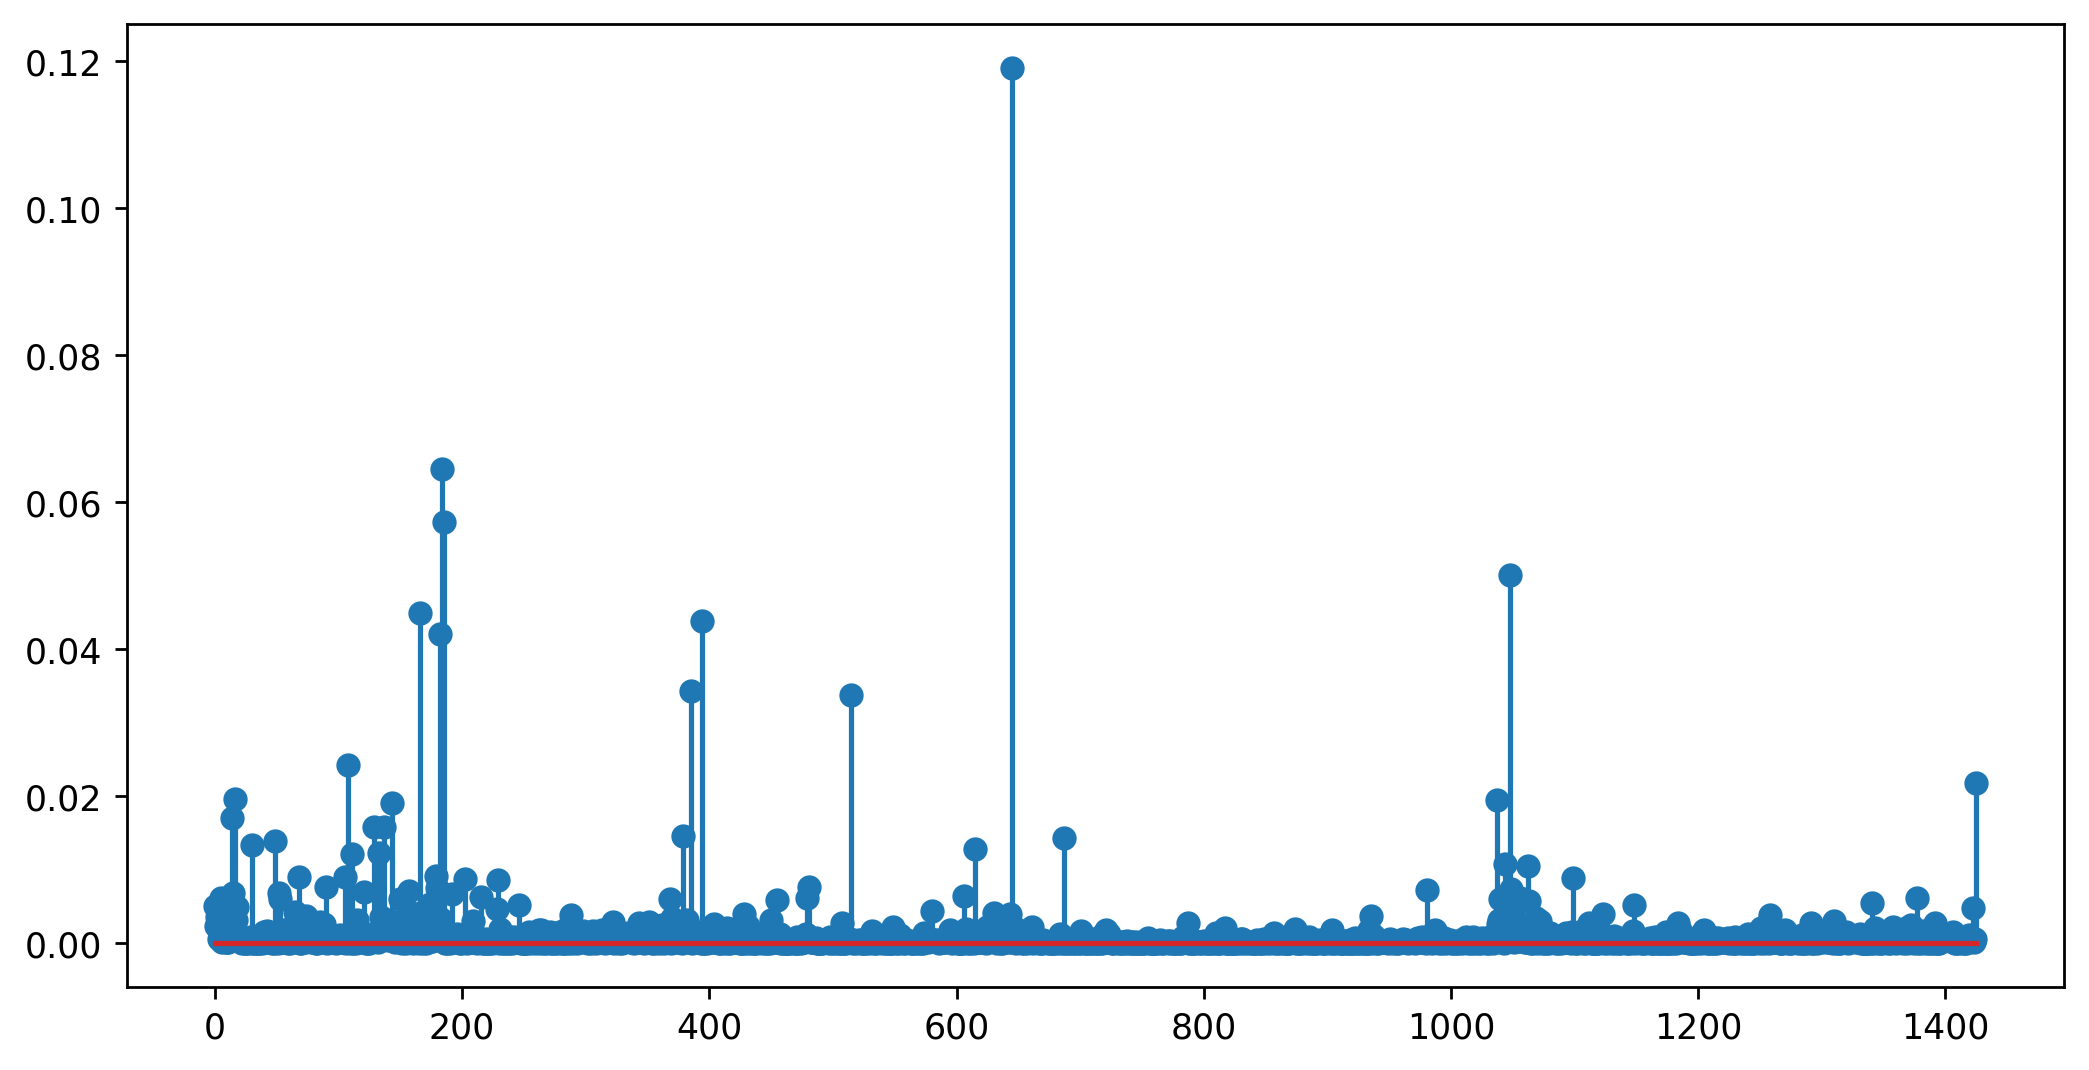

In [64]:
plt.stem(range(len(data_new)), c)

In [65]:
np.argmax(c), np.max(c)

(645, 0.11904609822281706)

So finally we can build our final model.

In [66]:
final_model = smf.ols('Price ~ Age + Mfg_Year + KM + HP + cc + Quarterly_Tax + Weight + Guarantee_Period', data=data_new).fit()

In [67]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1422.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:20:13   Log-Likelihood:                -12094.
No. Observations:                1426   AIC:                         2.421e+04
Df Residuals:                    1417   BIC:                         2.425e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.285e+06   2.26e+05    -10.115      0.000   -2.73e+06   -1.84e+06
Age                -20.2729      9.337     -2.171      0.030     -38.588      -1.958
Mfg_Year          1134.9120    112.801     10.061      0.000     913.637    1356.187
KM                  -0.0171      0.001    -14.944      0.000      -0.019      -0.015
HP                  34.7919      2.565     13.566      0.000      29.761      39.823
cc                  -3.2853      0.296    -11.106      0.000      -3.866      -2.705
Quarterly_Tax        5.1369      1.344      3.821      0.000       2.500       7.774
Weight              28.0928      1.254     22.401      0.000      25.633      30.553
Guarantee_Period    50.1829     12.114      4.143      0.000      26.420      73.946
==============================================================================
Omnibus:                       94.997   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.489
Skew:                           0.073   Prob(JB):                     4.92e-92
Kurtosis:                       5.656   Cond. No.                     5.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We have recieved accuracy of almost 90% which is considered good enough for predictions.

Therefore now we do predictions for sample data.

In [68]:
data_new.head()

Price  Age  Mfg_Year     KM  HP    cc  Quarterly_Tax  Weight  \
0  13500   23      2002  46986  90  2000            210    1165   
1  13750   23      2002  72937  90  2000            210    1165   
2  13950   24      2002  41711  90  2000            210    1165   
3  14950   26      2002  48000  90  2000            210    1165   
4  13750   30      2002  38500  90  2000            210    1170   

   Guarantee_Period  
0                 3  
1                 3  
2                 3  
3                 3  
4                 3

In [69]:
data_new.columns

Index(['Price', 'Age', 'Mfg_Year', 'KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight',
       'Guarantee_Period'],
      dtype='object')

In [70]:
sample_data = pd.DataFrame({
    'Age' : [7,19,3,13,11,9,22],
    'Mfg_Year' : [2001,2003,1998,2003,2001,1996,2000],
    'KM' : [12000, 41000, 3100, 87002, 120938, 3461, 8976364],
    'HP' : [112,125,260,180,210,210,580],
    'cc' : [1200,1500,2000,2000,2300,800,7000],
    'Quarterly_Tax' : [210,210,120,280,70,250,800],
    'Weight' : [1165,1156,1800,1402,1238,382,8734],
    'Guarantee_Period' : [3,3,4,12,3,10,8]
    
})

In [71]:
final_model.predict(sample_data)

0    19032.525394
1    19777.893145
2    35808.560570
3    27107.216998
4    18219.173817
5    -3253.017336
6    77712.565633
dtype: float64